In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from IPython.display import display

In [4]:
# %load ../dist_skew_plots.py
import seaborn as sns
from scipy.stats import skewtest, skew
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['font.size'] = 14

def dist_skew_plots(data,
                    sub_width=4, sub_height=4,
                    plot_width=20,
                    setup_subplots=None,
                    palette='gist_rainbow',
                    show_palette=True,
                    **kwargs):

    n = len(data.columns)
    colors = [(tuple(x**.3 for x in rgb), tuple(x**3 for x in rgb)) for rgb in sns.color_palette(palette, n_colors=n)]

    if show_palette:
        sns.palplot(sns.color_palette(palette, n_colors=n))

    if not setup_subplots:
        cols = int(plot_width / sub_width)
        rows = int((n + cols - 1) / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(plot_width,rows * sub_height))
        plt.subplots_adjust(hspace=0.3, wspace=0.2)
    else:
        fig = setup['fig'] if 'fig' in setup else setup[0]
        axes = setup['axes'] if 'axes' in setup else setup[1]


    for ((rgb, dark_rgb), column, ax) in zip(colors, data.columns, axes.flat):
        if data[column].isnull().any():
            ax.text(.5, .5,
                ('{} had {} NaN\n'
                'values (of {}).\n'
                'Skipping.').format(
                    str(column).title(),
                    data[column].isnull().sum(),
                    len(data[column])),
                horizontalAlignment = 'center',
                verticalAlignment = 'center',
                color='r',
                fontsize=16,
                bbox = dict(facecolor='w', alpha=0.75),
                transform = ax.transAxes
                )
            ax.grid()
            ax.set_xticks([])
            ax.set_yticks([])
            continue

        options = {'kde': True,
                   'kde_kws': {'shade': True, 'color':dark_rgb},
                   'hist_kws': {'edgecolor': 'k'},}
        options.update(kwargs)
        sns.distplot(data[column], color=rgb, axlabel=False, ax=ax, **options)
        ax.set_title(str(column).title())
        ax.grid(axis='x')
        ax.set_yticks([])

        if data[column].nunique() == 2:
            continue
        else:
            stat, pvalue = skewtest(data[column])
            direction = 'left' if stat > 0 else 'right'
            x = 0.75 if stat > 0 else 0.25
            if pvalue < 0.05:
                ax.text(x, 0.75,
                    'Skewed\n{}: {:.2f}'.format(direction, skew(data[column])),
                    horizontalAlignment='center',
                    bbox=dict(facecolor='w', alpha=0.75),
                    transform=ax.transAxes)

    for i in xrange(n - rows*cols, 0):
        plt.delaxes(axes.flat[i])

    plt.show()

In [5]:
import pandas as pd
from IPython.display import display

def stats(data, others=dict()):
    if not isinstance(data, pd.DataFrame):
        data = data.to_frame()
    stats = pd.concat([data.nunique(), data.dtypes, data.isnull().sum()], axis=1)
    stats.columns = ['Unique', 'Dtypes', 'NaN Count']
    for k,v in others.items():
        stats[k] = v(data)
    return stats

def page(data, wrap_cols=14):
    if not isinstance(data, pd.DataFrame):
        data = data.to_frame().T
    for i in xrange(wrap_cols, data.shape[1]+wrap_cols, wrap_cols):
        print 'Columns', i-wrap_cols, '-', min(i-1,data.shape[1]-1)
        display(data.iloc[:, i-wrap_cols:i])

In [6]:
train = pd.read_csv('train_final.csv', index_col=0)
test = pd.read_csv('test_final.csv', index_col=0)
page(train.head(), 100)
page(test.head(), 100)

Columns 0 - 27


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0.107576,0,0.0,1,1,1,1,...,104,22902.0,1,0,18,0.042295,1,0,27,0.028250
2,0,1,0,0.142357,0,0.0,7,1,1,1,...,144,11400.0,1,0,8,0.021417,1,0,67,0.253574
3,0,1,0,0.492318,0,3.0,4205,1,1,3,...,112,4833.0,1,0,13,0.502212,1,1,35,0.373397
4,0,1,0,-0.053028,0,2.0,2,1,1,5,...,127,3250.0,1,1,8,0.000000,1,0,50,0.674254
5,0,1,0,0.730797,0,0.0,11,1,1,1,...,148,4000.0,1,1,5,0.787592,1,0,71,0.371157


Columns 0 - 26


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,,,,,,,,
49999,1,0,0.460297,0,0.0,1,1,1,1,3,...,127,5016.0,1,0,8,0.405964,1,2,50,0.943392
50000,1,0,0.112573,0,3.0,2,1,1,1,1,...,137,8300.0,1,5,5,0.100761,1,0,60,0.161306
50001,1,0,0.061461,1,0.0,29,1,1,3,1,...,142,NaN,1,5,4,0.063096,1,0,65,705.000000
50002,1,0,0.523372,0,0.0,1,1,1,1,0,...,160,2500.0,1,1,7,0.534274,1,0,83,0.358657
50003,1,0,0.586772,0,2.0,44188,1,1,7,1,...,106,7472.0,1,4,12,0.759767,1,0,29,0.244748


In [7]:
allX = pd.concat([train.loc[:,'F1':'F27'], test])
page(stats(allX).T)

Columns 0 - 13


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
Unique,12,13,99992,11,12,2984,12,11,438,27,45,12,10,17
Dtypes,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64
NaN Count,0,0,0,0,2621,0,0,0,0,0,0,0,0,0


Columns 14 - 26


,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
Unique,10,431,10,85,11809,12,449,57,84314,11,15,85,78817
Dtypes,int64,float64,int64,int64,float64,int64,int64,int64,float64,int64,int64,int64,float64
NaN Count,0,0,0,0,19812,0,0,0,0,0,0,0,0


In [8]:
allX_ordered = allX[allX.select_dtypes(['int64']).columns.tolist() + allX.select_dtypes(['float64']).columns.tolist()]
page (stats(allX_ordered).T)

Columns 0 - 13


,F1,F2,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F17
Unique,12,13,11,2984,12,11,438,27,45,12,10,17,10,10
Dtypes,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
NaN Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Columns 14 - 26


,F18,F20,F21,F22,F24,F25,F26,F3,F5,F16,F19,F23,F27
Unique,85,12,449,57,11,15,85,99992,12,431,11809,84314,78817
Dtypes,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64
NaN Count,0,0,0,0,0,0,0,0,2621,0,19812,0,0


# Plotting distributions

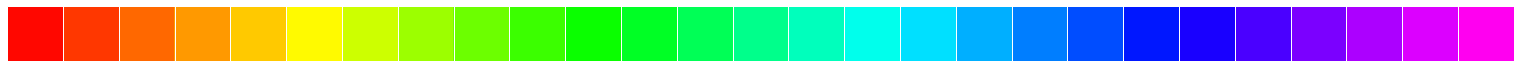

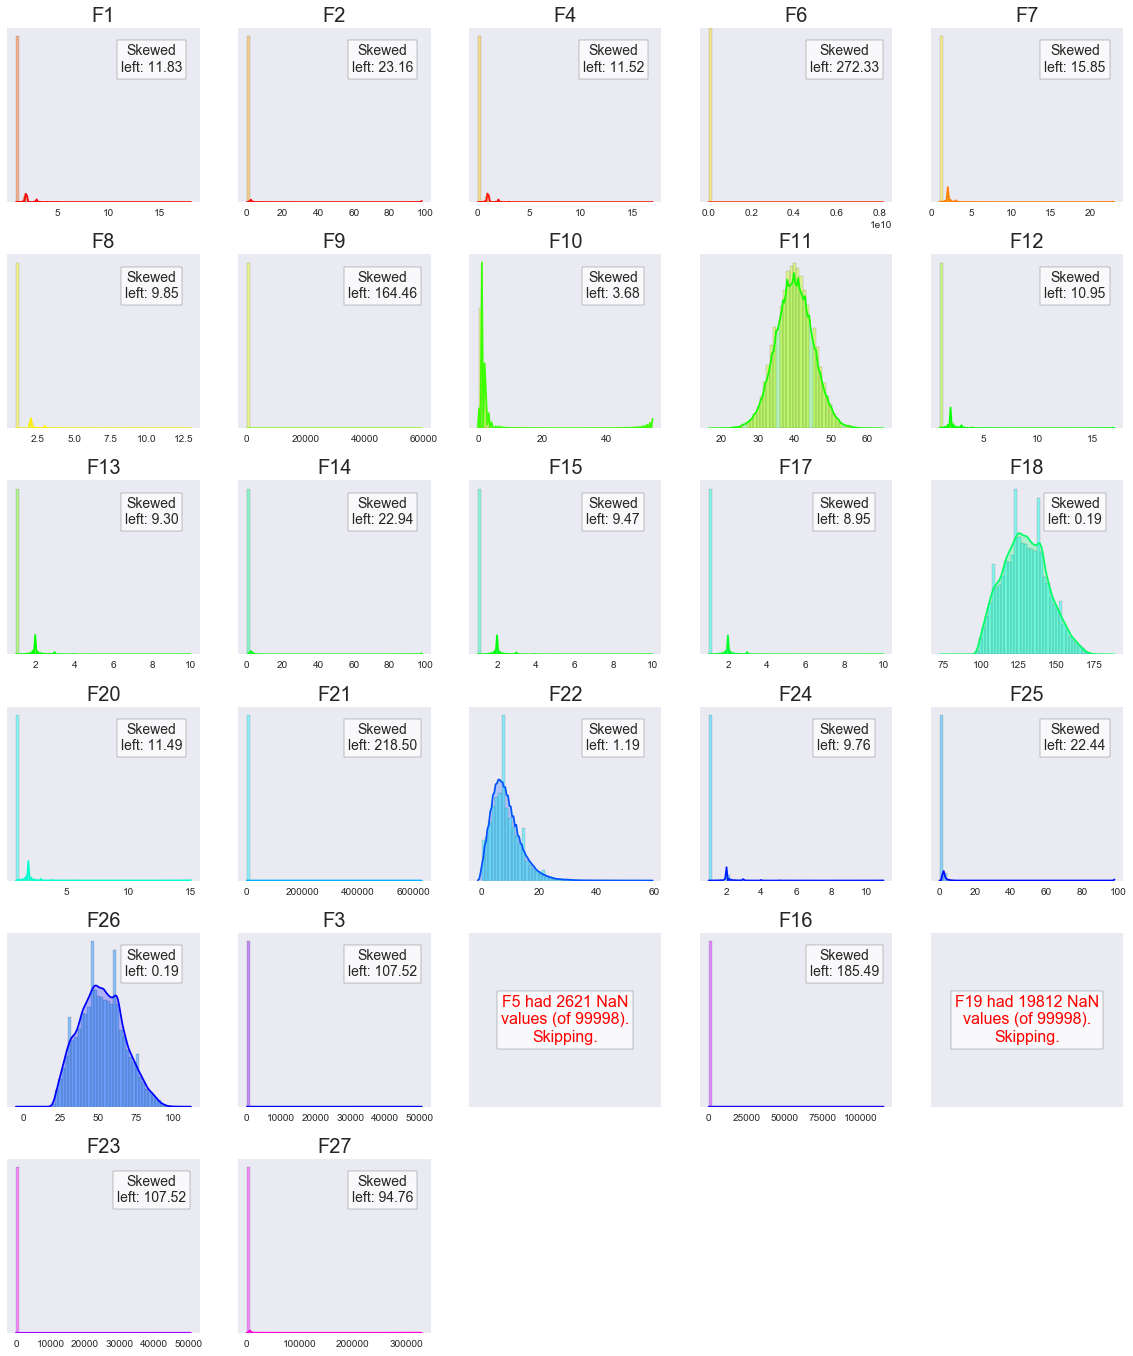

In [28]:
dist_skew_plots(allX_ordered)

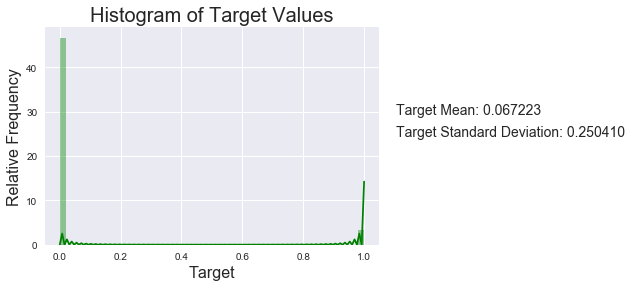

In [29]:
ax = sns.distplot(train['Y'], kde=True, color="g")
plt.text(1.05, .6, 'Target Mean: {:4f}'.format(train['Y'].mean()), transform=ax.transAxes)
plt.text(1.05, .5, 'Target Standard Deviation: {:4f}'.format(train['Y'].std()), transform=ax.transAxes)

plt.title('Histogram of Target Values')
plt.xlabel('Target')
_= plt.ylabel('Relative Frequency')

# Unskew transforms

In [30]:
from scipy.stats import norm

def histogram_flatten (data, cf_new_inverse=norm.ppf, max_bins=np.Inf, min_bins=100, verbose=False, save=False):
    bins = min(max(min(data.shape[0],min_bins),data.shape[0]/2), max_bins)
    if verbose:
        print 'Bins used:', bins

    hist, bins = np.histogram(data, bins=bins)
    if len(hist) < 3:
        return None
    cf = np.cumsum(hist)
    cf = cf / 1.0 / cf[-1]
    cf_new = cf_new_inverse(cf)    

    if cf_new[-1] == np.Inf:
        cf_new[-1] = cf_new[-2] + cf_new[-2] - cf_new[-3]

    if save:
        return np.interp(data, bins[:-1], cf_new), [cf_new, bins[:-1]]
    else:
        return np.interp(data, bins[:-1], cf_new)

def histogram_flatten_inverse (data, hist=None, bins=None):
    return np.interp(data, hist, bins)

a = np.r_[1, 2, 3,4]
b = np.r_[40, 50, 60,80]
c = np.r_[1.1, 2.5, 2.2, 1.9]
c = np.cumsum(c / sum(c))
aa, [hist, bins] = histogram_flatten(a, lambda x: np.interp(x, c, b), save=True)
print aa, [hist, bins]
histogram_flatten_inverse(aa, hist, bins)

[ 43.3         54.0530303   73.29545455  80.        ] [array([ 43.3       ,  51.13636364,  59.88636364,  80.        ]), array([ 1.  ,  1.75,  2.5 ,  3.25])]


array([ 1.  ,  2.  ,  3.  ,  3.25])

In [31]:
from scipy.stats import boxcox as boxcox

def is_skewed(data, pvalue_cutoff=0.05):
    if len(np.unique(data)) <= 2:
        return False
    return skewtest(data).pvalue < pvalue_cutoff

def fourth_root(x):
    return x**0.25

def histogram_full(x, **kwargs):
    return histogram_flatten(x,min_bins=np.Inf, **kwargs)

def inv_sqrt_p1(x):
    return 1.0/(1+x**0.5)

def inv_p1(x):
    return 1.0/(1+x)

def inv_1_5_p1(x):
    return 1.0/(1+x**1.5)

def inv_sq_p1(x):
    return 1.0/(1+x**2)

def box_cox(x, save=False):
    if np.min(x) <= 0:
        shift = abs(np.min(x)) + 1
        x += shift
        result = [e for e in boxcox(x)] + [shift]
    else:
        result = boxcox(x)
    if save:
        return result
    else:
        return result[0]

def inv_box_cox(x, lam=None, shifted_by=1):
    if lam == 0:
        result = np.exp(x)
    else:
        result = (lam*x + 1)**(1.0/lam)
    if shifted:
        return result - shifted_by
        


def pick_unskew(data, transforms=[], verbose=False, return_skews=False, inverting=False):
    transforms = np.unique([np.sqrt,
                            np.cbrt,
                            fourth_root,
                            np.log1p,
                            histogram_flatten,
                            histogram_full,
                            inv_sqrt_p1,
                            inv_p1,
                            inv_1_5_p1,
                            inv_sq_p1,
                            box_cox
                           ] + transforms).tolist()
    
    flip = skew(data) < 0
    if flip:
        data = max(data) - data
    
    skews = [skew(f(data)) for f in transforms]
    best = np.argmin(np.abs(skews))
    
    if verbose:
        print data.name
        print 'Skews:', {func:skew for func,skew in zip(transforms,skews)}
        print 'Transform Picked:', transforms[best]
        print 'Flipped:', flip
        print
    
    if inverting and transforms[best] in (histogram_flatten, histogram_full):
        _, [hist, bins] = transforms[best](data, save=True)
        if not return_skews:
            return transforms[best], flip, hist, bins
        else:
            return transforms[best], flip, skews, hist, bins
    
    if not return_skews:
        return transforms[best], flip
    else:
        return transforms[best], flip, skews
    

def unskew(data, transforms=[], **kwargs):
    transform, flip = pick_unskew(data, transforms, **kwargs)
    
    if flip:
        return pd.Series(transform(max(data) - data), index=data.index, name=data.name)
    else:
        return pd.Series(transform(data), index=data.index, name=data.name)

    
def reskew(data, inverse, flip=False, **kwargs):
    if inverse == np.sqrt:
        inverse = lambda x: x**2
    elif inverse == np.cbrt:
        inverse = lambda x: x**3
    elif inverse == fourth_root:
        inverse = lambda x: x**4
    elif inverse == np.log1p:
        inverse = np.expm1
    elif inverse in (histogram_flatten, histogram_full):
        inverse = histogram_flatten_inverse
    elif inverse == inv_sqrt_p1:
        inverse = lambda x: 1.0/(x)**2 - 1
    elif inverse == inv_p1:
        inverse = lambda x: 1.0/(x) - 1
    elif inverse == inv_1_5_p1:
        inverse = lambda x: 1.0/(x)**.67 - 1
    elif inverse == inv_sq_p1:
        inverse = lambda x: 1.0/(x)**0.5 - 1
    elif inverse == box_cox:
        inverse = inv_box_cox
                            
    result = inverse(data, **kwargs)
    if not flip:
        return pd.Series(result, index=data.index, name=data.name)
    else:
        return pd.Series(max(result) - result, index=data.index, name=data.name)

allX_unskew = allX_ordered.fillna(allX_ordered.median()).apply(lambda column: unskew(column, verbose=True) if is_skewed(column) else column)
skew_stats = pd.DataFrame()
skew_stats['Skew'] = allX.apply(lambda x: skew(x))
skew_stats['Transformed Skew'] = allX_unskew.apply(lambda x: skew(x))
skew_stats['Delta Skew'] = skew_stats['Transformed Skew'] - skew_stats['Skew']
page(skew_stats.T, 12)

F1
Skews: {<function box_cox at 0x00000000191A3EB8>: 5.039516938548931, <function inv_sq_p1 at 0x0000000017354A58>: -5.214809033915049, <ufunc 'log1p'>: 6.463473105862619, <ufunc 'cbrt'>: 6.579465699925275, <function inv_1_5_p1 at 0x00000000173544A8>: -5.344467714452229, <function inv_sqrt_p1 at 0x00000000192E30B8>: -5.772548277329498, <ufunc 'sqrt'>: 7.168922851733513, <function histogram_full at 0x00000000192E3BA8>: 5.880400766321925, <function histogram_flatten at 0x00000000191D24A8>: 5.880400766321925, <function inv_p1 at 0x00000000173549E8>: -5.538578497508236, <function fourth_root at 0x00000000192E35F8>: 6.361454442886637}
Transform Picked: <function box_cox at 0x00000000191A3EB8>
Flipped: False

F1
Skews: {<function box_cox at 0x00000000191A3EB8>: 5.039516938548931, <function inv_sq_p1 at 0x0000000017354A58>: -5.214809033915049, <ufunc 'log1p'>: 6.463473105862619, <ufunc 'cbrt'>: 6.579465699925275, <function inv_1_5_p1 at 0x00000000173544A8>: -5.344467714452229, <function inv_s

F17
Skews: {<function box_cox at 0x00000000191A3EB8>: 5.017329740727414, <function inv_sq_p1 at 0x0000000017354A58>: -5.181932728761912, <ufunc 'log1p'>: 6.277840680146482, <ufunc 'cbrt'>: 6.325117949661559, <function inv_1_5_p1 at 0x00000000173544A8>: -5.305098017302429, <function inv_sqrt_p1 at 0x00000000192E30B8>: -5.694248538804825, <ufunc 'sqrt'>: 6.725607329594988, <function histogram_full at 0x00000000192E3BA8>: 5.747463963655532, <function histogram_flatten at 0x00000000191D24A8>: 5.747463963655532, <function inv_p1 at 0x00000000173549E8>: -5.487410664598265, <function fourth_root at 0x00000000192E35F8>: 6.164127120638607}
Transform Picked: <function box_cox at 0x00000000191A3EB8>
Flipped: False

F18
Skews: {<function box_cox at 0x00000000191A3EB8>: -0.004870337658912155, <function inv_sq_p1 at 0x0000000017354A58>: 0.538112083478219, <ufunc 'log1p'>: -0.056895761373399856, <ufunc 'cbrt'>: 0.022575181037262113, <function inv_1_5_p1 at 0x00000000173544A8>: 0.4187618992455744, <fu

C:\Users\spenc\Anaconda3\envs\py27\lib\site-packages\scipy\stats\stats.py:1031: RuntimeWarning: invalid value encountered in power
  lambda m2, m3: m3 / m2**1.5,


F3
Skews: {<function box_cox at 0x00000000191A3EB8>: 0.16606157240440728, <function inv_sq_p1 at 0x0000000017354A58>: -1.2638780671935632, <ufunc 'log1p'>: 18.988972772850975, <ufunc 'cbrt'>: 31.346941942100337, <function inv_1_5_p1 at 0x00000000173544A8>: nan, <function inv_sqrt_p1 at 0x00000000192E30B8>: -4.21091834687984, <ufunc 'sqrt'>: 40.517796315903205, <function histogram_full at 0x00000000192E3BA8>: 0.6243049824074581, <function histogram_flatten at 0x00000000191D24A8>: 0.32513685273653237, <function inv_p1 at 0x00000000173549E8>: -0.21008401186097891, <function fourth_root at 0x00000000192E35F8>: 27.53293182625012}
Transform Picked: <function inv_1_5_p1 at 0x00000000173544A8>
Flipped: False

F5
Skews: {<function box_cox at 0x00000000191A3EB8>: 0.5158687244781841, <function inv_sq_p1 at 0x0000000017354A58>: -0.7130131034865974, <ufunc 'log1p'>: 1.0355115317852932, <ufunc 'cbrt'>: 1.0538953944110099, <function inv_1_5_p1 at 0x00000000173544A8>: -0.6626535342627254, <function in

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
Skew,11.830145,23.164815,107.524264,11.519457,NaN,272.326680,15.846918,9.852121,164.46098,3.684081,0.006098,10.951923
Transformed Skew,5.039517,4.108316,-0.578948,4.996952,0.515869,0.119549,5.035536,5.029184,-0.62720,0.045641,0.006098,4.958359
Delta Skew,-6.790628,-19.056499,-108.103212,-6.522505,NaN,-272.207132,-10.811381,-4.822937,-165.08818,-3.638440,0.000000,-5.993564


Columns 12 - 23


,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
Skew,9.295509,22.940347,9.472343,185.491985,8.948861,0.187150,NaN,11.490565,218.501817,1.193478,107.524624,9.755287
Transformed Skew,4.919028,3.851477,4.982970,-0.553278,5.017330,0.002182,-0.063516,5.037128,0.653120,0.006781,0.352583,5.001636
Delta Skew,-4.376481,-19.088869,-4.489373,-186.045263,-3.931531,-0.184968,NaN,-6.453438,-217.848696,-1.186697,-107.172040,-4.753651


Columns 24 - 26


,F25,F26,F27
Skew,22.443460,0.187150,94.762238
Transformed Skew,1.858185,-0.035956,-1.283797
Delta Skew,-20.585274,-0.223106,-96.046035


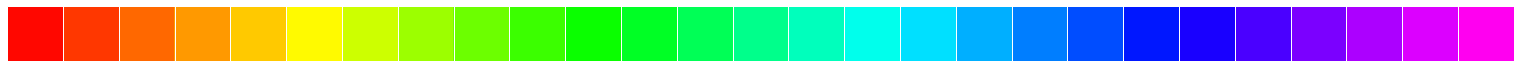

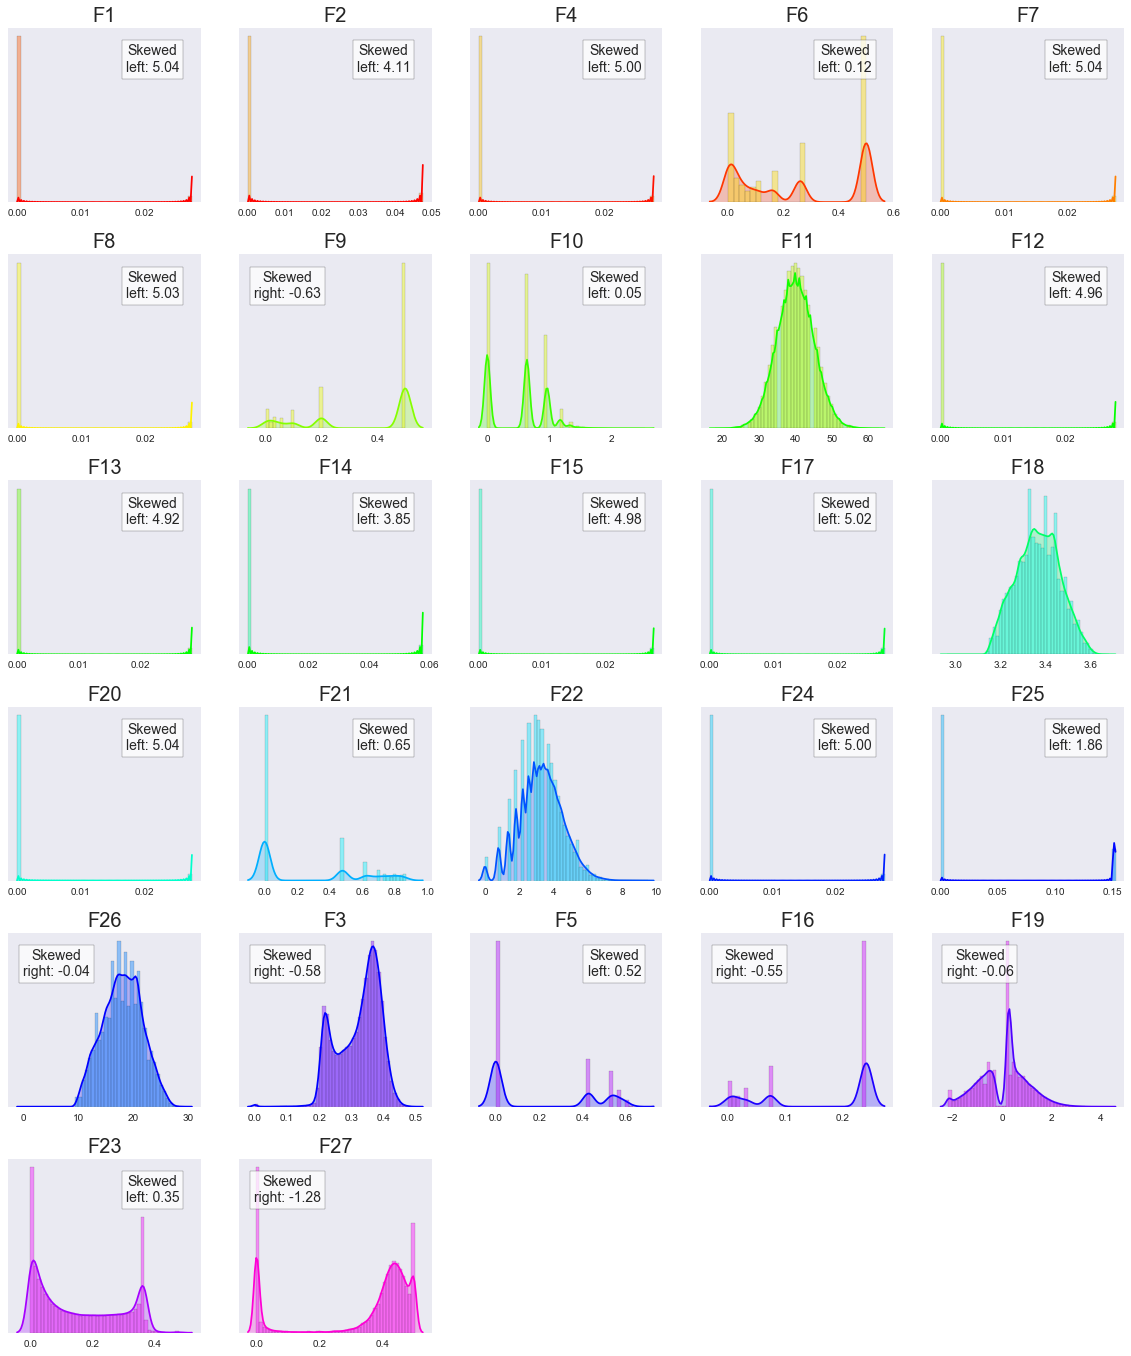

In [32]:
dist_skew_plots(allX_unskew)

# Devise custom one-hot encoding based on value_counts() and "gain" statistic

I individually applied the following three functionsfor each feature and determined a value_count cutoff for which to group feature values as their own "other" category.

To do this, I measured the "gain" of each of the feature's unique values and compared the 'sum of the absolute gains of the feature values" with the "sum of the absolute gains of the feature values when cutoff values are grouped".

Gain is defined for a given feature value as P(Feature=x and Y=0) - P(Y=0). It is intended to measure the dependence of the class label on the Feature value.

In [33]:
def test_cutoff(data, cut):
    d = pd.DataFrame()
    d['Original # Unique'] = [data.nunique()]
    count = data.value_counts().to_dict()
    index = data.apply(lambda x: count[x] > cut if not np.isnan(x) else False)

    d['# Unique After Drop'] = [data[index].nunique()]
    d['Kept'] = ['{} of {} ({:.2f}%)'.format(data[index].shape[0], data.shape[0], 100.0 * data[index].shape[0] / data.shape[0])]
    d['Dropped'] = [data.shape[0] - data[index].shape[0]]
    d.index = ['Results']
    return d.T

In [34]:
def cut_stats(feature, cut, ylog=True, xlog=False, page_counts=1000000, plot=True):
    d = allX_ordered[feature]
    data = d.value_counts().sort_index()

    if plot:
        plt.scatter(data.index, data, c=data.apply(lambda x:'r' if x<=cut else 'g'))
        if ylog:
            plt.yscale('log')
        if xlog:
            plt.xscale('log')
        plt.yticks(data, data)
        plt.xticks(data.index, data.index)

    page(test_cutoff(d,cut))
    data.index = [-x if data[x]<=cut else x for x in data.index]
    data.name = 'Value Count'
    if page_counts:
        page(data.head(page_counts).T)

In [35]:
def feature_stats(feature, cut=0, page_freq=1000000, page_counts=1000000, page_dropped=True, mute=False, invert_index=True):
    count = train[train['Y'] == 0].shape[0]
    ratio = count /1.0/ train.shape[0]
    odds = ratio / (1-ratio)
    
    data = train[feature]
    freq = pd.DataFrame(index=data.unique())
    freq.index.name = feature
    freq['Y=0'] = [train[(train['Y'] == 0) & (data == x)].shape[0] if not np.isnan(x) else
                   train[(train['Y'] == 0) & (data.isnull())].shape[0]
                   for x in data.unique()]
    freq['Y=1'] = [train[(train['Y'] == 1) & (data == x)].shape[0] if not np.isnan(x) else
                   train[(train['Y'] == 1) & (data.isnull())].shape[0]
                   for x in data.unique()]
    freq['P(Y=0|x)'] = [train[(train['Y'] == 0) & (data == x)].shape[0]/1.0/(train[data==x]).shape[0] if not np.isnan(x) else
                        train[(train['Y'] == 0) & (data.isnull())].shape[0]/1.0/(train[data.isnull()]).shape[0]
                        for x in data.unique()]
    freq['count'] = data.value_counts()
    if any(data.isnull()):
        freq.loc[np.nan, 'count'] = freq.loc[np.nan, 'Y=0'] + freq.loc[np.nan, 'Y=1']
    freq['gain'] = (freq['P(Y=0|x)'] - ratio) * freq['count'] / train.shape[0]
    freq.sort_index(inplace=True)
    
    if invert_index:
        freq.index = [-x if freq.loc[x,'count']<=cut else x for x in freq.index.sort_values()]
        
    if page_freq and not mute:
        page(freq.head(page_freq))
    if page_counts and not mute:
        page(pd.concat([freq['count'], (freq['gain'] * train.shape[0]).astype(int)],axis=1).head(page_counts).T)
    
    dropped = freq.loc[freq['count']<=cut, 'gain']
    if page_dropped and not mute:
        page(stats(dropped, {'Summed Gain':np.sum, 'Stddev Gain':np.std, 'Abs Summed Gain': lambda x: np.sum(np.abs(x))}))
        page(dropped.describe())
    
    if not mute:
        print 'Overall count:\t', count
        print 'Overall ratio:\t', ratio
        print 'Overall odds:\t', odds
        print
    
        print 'Feature gain:\t', sum(abs(freq['gain']))
    
    return freq

Columns 0 - 0


,Results
Original # Unique,13
# Unique After Drop,7
Kept,99972 of 99998 (99.97%)
Dropped,26


Columns 0 - 12


,0,1,2,3,4,5,-6,-7,-8,-9,-11,-96,98
Value Count,94954,3805,756,201,57,21,11,7,2,1,1,4,178


Columns 0 - 4


,Y=0,Y=1,P(Y=0|x),count,gain
0,45018,2452,0.948346,47470,0.014782
1,1322,583,0.693963,1905,-0.009099
2,185,194,0.488127,379,-0.003371
3,47,57,0.451923,104,-0.001000
4,12,20,0.375000,32,-0.000357
-5,5,4,0.555556,9,-0.000068
-6,1,5,0.166667,6,-0.000092
-7,0,1,0.000000,1,-0.000019
-9,1,0,1.000000,1,0.000001
-11,0,1,0.000000,1,-0.000019


Columns 0 - 11


,0,1,2,3,4,-5,-6,-7,-9,-11,-96,98
count,47470,1905,379,104,32,9,6,1,1,1,3,87
gain,739,-454,-168,-50,-17,-3,-4,0,0,0,-2,-35


Columns 0 - 5


,Unique,Dtypes,NaN Count,Abs Summed Gain,Stddev Gain,Summed Gain
gain,5,float64,0,0.000254,0.000032,-0.000252


Columns 0 - 7


,count,mean,std,min,25%,50%,75%,max
gain,6.0,-0.000042,0.000036,-0.000092,-0.000065,-0.000037,-0.000019,0.000001


Overall count:	46637
Overall ratio:	0.932777311092
Overall odds:	13.8759297828

Feature gain:	0.0295663132578


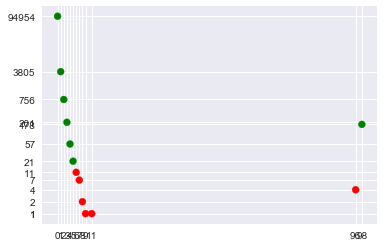

In [36]:
#      0  1   2   3   4  5   6   7   8  9  10  11  12  13 14  15  16  17  18    19    20  21 22
cut = [4, 11, 3, 20, 11, 4, 20, 14, 60, 6, 10, 11, 18, 5, 31, 10, 30, 31, 1510, 5363, 69, 5, 20]
feature = ['F1','F2','F4','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F17','F18','F20','F21','F22','F24','F25','F26','F5','F16']
#           0    1    2    3    4    5    6    7     8     9     10    11    12    13    14    15    16    17    18    19    20    21   22
i = 1
cut_stats(feature[i], cut[i], xlog=0, page_counts=150, plot=1)
_= feature_stats(feature[i], cut[i], page_freq=150, page_counts=150)

# Investigating "Gain" statistic

I report the gain of the original features versus that of the features after the cutoff-grouping transformation.

In [37]:
gains = pd.DataFrame(columns=['Gain','Cutoff Gain','Delta %'])
for c,f in zip(cut,feature):
    freq = feature_stats(f, mute=1)
    gains.loc[f,'Gain'] = sum(abs(freq['gain']))
    freq = feature_stats(f, c, mute=1)
    gains.loc[f,'Cutoff Gain'] = sum(abs(freq.loc[freq.index>=0,'gain'])) + abs(sum(freq.loc[freq.index<0,'gain']))
    gains.loc[f,'Delta %'] = (gains.loc[f,'Cutoff Gain'] - gains.loc[f,'Gain']) / gains.loc[f,'Gain'] * 100
    gains.loc[f,'Delta %'] = int(gains.loc[f,'Delta %']*100)/100 if abs(gains.loc[f,'Delta %']) >= 1e-2 else 0
page(gains.T)

Columns 0 - 13


,F1,F2,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F17
Gain,0.000601659,0.0295663,0.000611414,0.0115796,0.000209803,0.000418225,0.00428443,0.016528,0.00444328,0.000268882,0.000433025,0.0385388,0.000243106,0.000395565
Cutoff Gain,0.000601659,0.0295636,0.000603347,0.00471699,0.000209803,0.000418225,0.00291998,0.0165119,0.00441672,0.000263503,0.000433025,0.0385334,0.000208482,0.000395565
Delta %,0,0,-2,-60,0,0,-32,-1,-1,-2,0,-1,-15,0


Columns 14 - 22


,F18,F20,F21,F22,F24,F25,F26,F5,F16
Gain,0.0259749,0.000576457,0.00402278,0.0137155,0.000801754,0.0449268,0.0259749,0.0100521,0.00376533
Cutoff Gain,0.0259009,0.000576457,0.00250922,0.0136506,0.000799398,0.0449268,0.0258864,0.00966732,0.00250889
Delta %,-1,0,-38,-1,-1,0,-1,-4,-34


In [38]:
gains['Delta %'].sum()/23.0

-8.434782608695652

In [39]:
gains['Gain'].sum()

0.23793263342998272

# I plot the gains to look for trends in the feature value versus the class label

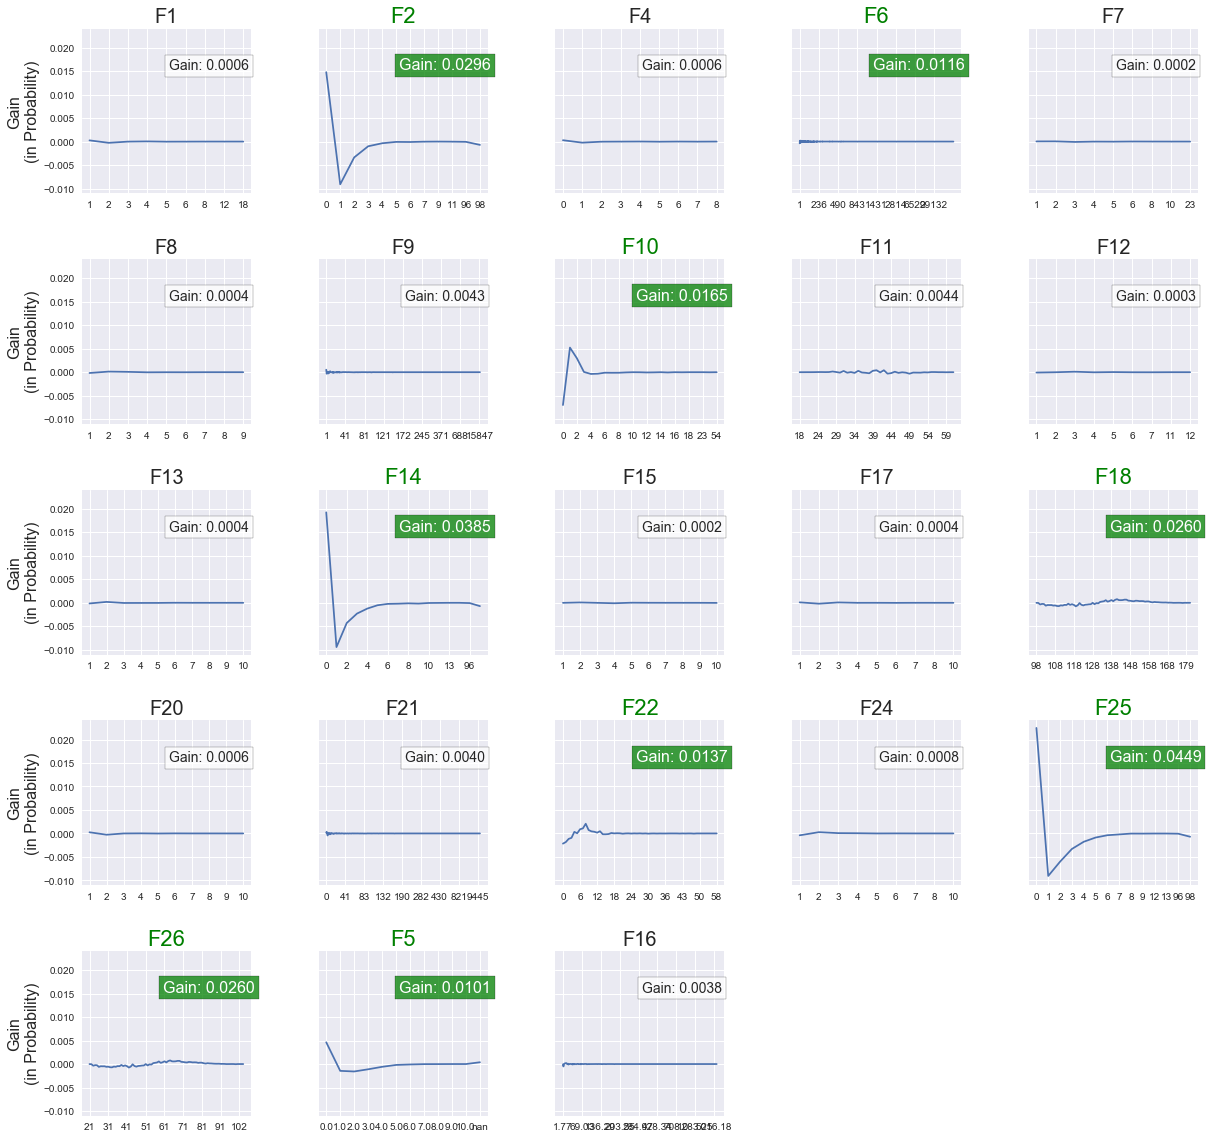

In [40]:
def setup_subplots (num_plots, plot_width = 20, sub_width=4, sub_height=4, hspace=.4, wspace=.4, sharey=False):
    n = num_plots
    cols = int(plot_width / sub_width)
    rows = int((n + cols - 1) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(plot_width,rows * sub_height), sharey=sharey)
    plt.subplots_adjust(hspace=hspace, wspace=wspace)
    for i in xrange(n - rows*cols, 0):
        plt.delaxes(axes.flat[i])
    return fig, axes

fig, axes = setup_subplots(len(feature), sharey=True)

for i, (feat, cutoff, ax) in enumerate(zip(feature, cut, axes.flat)):
    plt.sca(ax)
    gains_list = feature_stats(feat, cutoff, mute=True)['gain']
    N = len(gains_list)
    x = range(N)
    plt.plot(x, gains_list)
    if N > 8:
        plt.xticks(x[::N/8], abs(gains_list.index[::N/8]))
    else:
        plt.xticks(x, abs(gains_list.index))
    if i%5 == 0:
        plt.ylabel('Gain\n(in Probability)')
    total = sum(abs(gains_list))
    if total >= 0.01:
        plt.title(feat, color='g', fontsize=22)
        ax.text(0.75, 0.75,
            'Gain: {:.4f}'.format(total),
            horizontalAlignment='center',
            color='w',
            fontsize=16,
            bbox=dict(facecolor='g', alpha=0.75),
            transform=ax.transAxes)
    else:
        plt.title(feat)
        ax.text(0.75, 0.75,
            'Gain: {:.4f}'.format(total),
            horizontalAlignment='center',
            bbox=dict(facecolor='w', alpha=0.75),
            transform=ax.transAxes)


In [41]:
special = ['F6','F9','F21','F16']
other_special = ['F2','F14','F5']
regular = [f for f in feature if f not in special and f not in other_special]
exclude = ['F3','F19','F23','F27']

In [42]:
import time
timing = []
def tic():
    timing.append(time.clock())
def toc():
    print 'elapsed: {:2f} seconds'.format(time.clock() - timing.pop())

# "Perform feature transformations" area

Here is where the one-hot encoding happens, in addition to other feature engineering ideas I tried such as making a column of gain values for each feature.

In [57]:
def special_map(x):
    x *= 50000
    return -1 if x <= -.5 else \
            0 if -.5 < x <= .5 else \
            1

def mult(x, multiply):
    if multiply:
        return x
    else:
        return 1
    
def use_gain(x,gain_on):
    if gain_on:
        return x
    else:
        return 1
        
def get_transformedX (feature_gain=False, gain_on=True, multiply=False, page=True, mute=False):
    transformedX = pd.SparseDataFrame(index=allX.index)

    tic()
    for feat, cutoff in zip(feature, cut):
        if not mute:
            print 'feature:', feat, '\t', 'cutoff:', cutoff
            
        # Used for feature_gain flag
        columns = []

        if feat == 'F5':
            label = 'F5_leq_8'
            columns.append(label)
            transformedX[label] = allX[feat].apply(
                lambda x: use_gain(1.0/50000,gain_on) * mult(x, multiply) if not np.isnan(x) and x <= 8
                    else  np.nan
            )
            label = 'F5_ge_8_or_nan'
            columns.append(label)
            transformedX[label] = allX[feat].apply(
                lambda x: use_gain(-1.0/50000,gain_on) * mult(x, multiply) if np.isnan(x) or x > 8
                    else  np.nan
            )
            
            if feature_gain:
                label = '_'.join([feat, 'gain'])
                transformedX[label] = transformedX[columns].apply(
                    lambda x: reduce(
                        lambda a,b: a if not np.isnan(a) else b,
                        x
                    ),
                    reduce=True,
                    axis=1
                )
            continue

        if feat in other_special:
            value_map = allX[feat].value_counts().drop(96)
        else:
            value_map = allX[feat].value_counts()
            
        keep = value_map[value_map > cutoff].index
        drop = value_map[value_map <= cutoff].index

        gain_map = feature_stats(feat, cutoff, mute=True)['gain']

        keep_map = gain_map[gain_map.index >= 0]
        value_map[keep] = pd.Series(
            [np.interp(x, keep_map.index, keep_map) for x in keep],
            index=keep,
        )

        for value, gain in value_map[keep].iteritems():
            label = '_'.join([feat, str(value)])
            columns.append(label)

            if not (value in (96, 98) and feat in other_special):
                transformedX[label] = allX[feat].apply(
                    lambda x: use_gain(gain,gain_on) * mult(x, multiply) if x == value
                        else  np.nan
                )

        if feat in other_special:
            label = '_'.join([feat, '98'])
            columns.append(label)
            gain = value_map[keep][98]
            transformedX[label] = allX[feat].apply(
                lambda x: use_gain(gain,gain_on) if x in (96, 98)
                    else  np.nan
            )

        if feat in special:
            drop_map = gain_map[gain_map.index < 0]
            value_map[drop] = pd.Series(
                [special_map(np.interp(x, abs(drop_map.index), drop_map)) for x in drop],
                index=drop,
            )
            drop_set = value_map[drop]
            tail_values = drop_set.unique()
            mean = np.mean(drop_set)
            for value in tail_values:
                label = '_'.join([feat, 'tail', str(value)])    
                columns.append(label)
                transformedX[label] = allX[feat].apply(
                    lambda x: use_gain(value/50000.0,gain_on) * mult(mean, multiply) if x in drop_set and drop_set[x] == value
                        else  np.nan
                )
        else:
            label = '_'.join([feat, 'tail'])
            columns.append(label)
            tail_gain = sum(abs(gain_map[gain_map.index < 0]))
            drop_set = value_map[drop]
            transformedX[label] = allX[feat].apply(
                lambda x: use_gain(tail_gain,gain_on) if x in drop_set
                    else  np.nan
            )
        
        if feature_gain:
            label = '_'.join([feat, 'gain'])
            transformedX[label] = transformedX[columns].apply(
                lambda x: reduce(
                    lambda a,b: a if not np.isnan(a) else b,
                    x
                ),
                reduce=True,
                axis=1
            )

    toc()
    if not mute and page:
        page(transformedX.head())
                    
    return transformedX

In [44]:
page(allX_unskew.head())

Columns 0 - 13


,F1,F2,F4,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F17
id,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.500000,0.0,0.0,0.500000,0.000000,32,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.051229,0.0,0.0,0.500000,0.637068,44,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.000004,0.0,0.0,0.100000,0.637068,32,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.261204,0.0,0.0,0.038462,0.962195,46,0.0,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.026679,0.0,0.0,0.500000,0.637068,35,0.0,0.0,0.0,0.0,0.027329


Columns 14 - 26


,F18,F20,F21,F22,F24,F25,F26,F3,F5,F16,F19,F23,F27
id,,,,,,,,,,,,,
1,3.193437,0.0,0.000000,5.307481,0.0,0.000000,11.597991,0.357002,0.000000,0.241961,2.328722,0.039675,0.493036
2,3.464102,0.0,0.000000,3.379880,0.0,0.000000,21.643252,0.349046,0.000000,0.034251,1.378449,0.020726,0.443740
3,3.253153,0.0,0.000000,4.455304,0.0,0.151022,13.891506,0.281921,0.576624,0.241961,-0.391829,0.273635,0.421337
4,3.356997,0.0,0.477376,3.379880,0.0,0.000000,17.745364,0.397441,0.533009,0.073901,-0.886715,0.000000,0.373936
5,3.487911,0.0,0.477376,2.535377,0.0,0.000000,22.506765,0.246857,0.000000,0.241961,-0.608671,0.335657,0.421735


In [60]:
transformedX = get_transformedX(page=False)
transformedX_exclude = pd.concat([transformedX] + [allX[feat] for feat in exclude], axis=1)
transformedX_allX = pd.concat([transformedX] +[allX], axis=1)

transformedX_unskew_exclude = pd.concat([transformedX] + [allX_unskew[feat] for feat in exclude], axis=1)
transformedX_unskew_exclude_allX = pd.concat([transformedX_unskew_exclude] + [allX[feat] for feat in allX.columns if feat not in exclude], axis=1)
transformedX_unskew_allX = pd.concat([transformedX] + [allX_unskew], axis=1)

transformedX_gain = get_transformedX(feature_gain=True, page=False)
transformedX_gain_no_onehot = transformedX_gain[['_'.join([feat,'gain']) for feat in feature]].copy()
transformedX_gain = pd.concat([transformedX_gain] + [allX_unskew[feat] for feat in exclude], axis=1)
transformedX_gain_no_onehot = pd.concat([transformedX_gain_no_onehot] + [allX_unskew[feat] for feat in exclude], axis=1)

feature: F1 	cutoff: 4
feature: F2 	cutoff: 11
feature: F4 	cutoff: 3
feature: F6 	cutoff: 20
feature: F7 	cutoff: 11
feature: F8 	cutoff: 4
feature: F9 	cutoff: 20
feature: F10 	cutoff: 14
feature: F11 	cutoff: 60
feature: F12 	cutoff: 6
feature: F13 	cutoff: 10
feature: F14 	cutoff: 11
feature: F15 	cutoff: 18
feature: F17 	cutoff: 5
feature: F18 	cutoff: 31
feature: F20 	cutoff: 10
feature: F21 	cutoff: 30
feature: F22 	cutoff: 31
feature: F24 	cutoff: 1510
feature: F25 	cutoff: 5363
feature: F26 	cutoff: 69
feature: F5 	cutoff: 5
feature: F16 	cutoff: 20
elapsed: 35.099863 seconds
feature: F1 	cutoff: 4
feature: F2 	cutoff: 11
feature: F4 	cutoff: 3
feature: F6 	cutoff: 20
feature: F7 	cutoff: 11
feature: F8 	cutoff: 4
feature: F9 	cutoff: 20
feature: F10 	cutoff: 14
feature: F11 	cutoff: 60
feature: F12 	cutoff: 6
feature: F13 	cutoff: 10
feature: F14 	cutoff: 11
feature: F15 	cutoff: 18
feature: F17 	cutoff: 5
feature: F18 	cutoff: 31
feature: F20 	cutoff: 10
feature: F21 	cutoff

# "Create derivative data sets" area

I concatenate various portions of the original dataset and transformed features to see what combinations work.

In [226]:
import itertools as it

allX_unskew_exclude = pd.concat([allX_unskew[feat] for feat in exclude] + [allX[feat] for feat in allX.columns if feat not in exclude], axis=1)

pairs = pd.DataFrame(index=allX.index)
for (a,b) in it.combinations(allX_unskew_exclude.columns, 2):
    pairs[a + '_' + b] = allX_unskew_exclude[a] * allX_unskew_exclude[b]

page(pairs.head())

Columns 0 - 13


,F3_F19,F3_F23,F3_F27,F3_F1,F3_F2,F3_F4,F3_F5,F3_F6,F3_F7,F3_F8,F3_F9,F3_F10,F3_F11,F3_F12
id,,,,,,,,,,,,,,
1,0.831357,0.014164,0.176015,0.357002,0.0,0.0,0.000000,0.357002,0.357002,0.357002,0.357002,0.000000,11.424051,0.357002
2,0.481142,0.007234,0.154885,0.349046,0.0,0.0,0.000000,2.443319,0.349046,0.349046,0.349046,0.349046,15.358007,0.349046
3,-0.110465,0.077143,0.118784,0.281921,0.0,0.0,0.845763,1185.477658,0.281921,0.281921,0.845763,0.281921,9.021471,0.281921
4,-0.352416,0.000000,0.148617,0.397441,0.0,0.0,0.794881,0.794881,0.397441,0.397441,1.987203,0.794881,18.282268,0.397441
5,-0.150255,0.082859,0.104108,0.246857,0.0,0.0,0.000000,2.715432,0.246857,0.246857,0.246857,0.246857,8.640011,0.246857


Columns 14 - 27


,F3_F13,F3_F14,F3_F15,F3_F16,F3_F17,F3_F18,F3_F20,F3_F21,F3_F22,F3_F24,F3_F25,F3_F26,F19_F23,F19_F27
id,,,,,,,,,,,,,,
1,0.357002,0.0,0.357002,0.631893,0.357002,37.128167,0.357002,0.000000,6.426029,0.357002,0.000000,9.639043,0.092393,1.148144
2,0.349046,0.0,0.349046,1.853432,0.349046,50.262569,0.349046,0.000000,2.792365,0.349046,0.000000,23.386056,0.028570,0.611672
3,0.281921,0.0,0.281921,0.499000,0.281921,31.575148,0.281921,0.000000,3.664973,0.281921,0.281921,9.867234,-0.107218,-0.165092
4,0.397441,0.0,0.397441,1.406940,0.397441,50.474956,0.397441,0.397441,3.179525,0.397441,0.000000,19.872030,-0.000000,-0.331575
5,0.246857,0.0,0.246857,0.436938,0.493715,36.534905,0.246857,0.246857,1.234287,0.246857,0.000000,17.526880,-0.204305,-0.256698


Columns 28 - 41


,F19_F1,F19_F2,F19_F4,F19_F5,F19_F6,F19_F7,F19_F8,F19_F9,F19_F10,F19_F11,F19_F12,F19_F13,F19_F14,F19_F15
id,,,,,,,,,,,,,,
1,2.328722,0.0,0.0,0.000000,2.328722,2.328722,2.328722,2.328722,0.000000,74.519099,2.328722,2.328722,0.0,2.328722
2,1.378449,0.0,0.0,0.000000,9.649145,1.378449,1.378449,1.378449,1.378449,60.651771,1.378449,1.378449,0.0,1.378449
3,-0.391829,-0.0,-0.0,-1.175487,-1647.640258,-0.391829,-0.391829,-1.175487,-0.391829,-12.538523,-0.391829,-0.391829,-0.0,-0.391829
4,-0.886715,-0.0,-0.0,-1.773430,-1.773430,-0.886715,-0.886715,-4.433574,-1.773430,-40.788882,-0.886715,-0.886715,-0.0,-0.886715
5,-0.608671,-0.0,-0.0,-0.000000,-6.695385,-0.608671,-0.608671,-0.608671,-0.608671,-21.303499,-0.608671,-0.608671,-0.0,-0.608671


Columns 42 - 55


,F19_F16,F19_F17,F19_F18,F19_F20,F19_F21,F19_F22,F19_F24,F19_F25,F19_F26,F23_F27,F23_F1,F23_F2,F23_F4,F23_F5
id,,,,,,,,,,,,,,
1,4.121838,2.328722,242.187072,2.328722,0.000000,41.916993,2.328722,0.000000,62.875490,0.019561,0.039675,0.0,0.0,0.000000
2,7.319566,1.378449,198.496704,1.378449,0.000000,11.027595,1.378449,0.000000,92.356105,0.009197,0.020726,0.0,0.0,0.000000
3,-0.693537,-0.391829,-43.884830,-0.391829,-0.000000,-5.093775,-0.391829,-0.391829,-13.714009,0.115293,0.273635,0.0,0.0,0.820905
4,-3.138970,-0.886715,-112.612783,-0.886715,-0.886715,-7.093719,-0.886715,-0.000000,-44.335741,0.000000,0.000000,0.0,0.0,0.000000
5,-1.077348,-1.217343,-90.083367,-0.608671,-0.608671,-3.043357,-0.608671,-0.000000,-43.215669,0.141558,0.335657,0.0,0.0,0.000000


Columns 56 - 69


,F23_F6,F23_F7,F23_F8,F23_F9,F23_F10,F23_F11,F23_F12,F23_F13,F23_F14,F23_F15,F23_F16,F23_F17,F23_F18,F23_F20
id,,,,,,,,,,,,,,
1,0.039675,0.039675,0.039675,0.039675,0.000000,1.269607,0.039675,0.039675,0.0,0.039675,0.070225,0.039675,4.126223,0.039675
2,0.145085,0.020726,0.020726,0.020726,0.020726,0.911966,0.020726,0.020726,0.0,0.020726,0.110058,0.020726,2.984615,0.020726
3,1150.634929,0.273635,0.273635,0.820905,0.273635,8.756318,0.273635,0.273635,0.0,0.273635,0.484334,0.273635,30.647113,0.273635
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,3.692229,0.335657,0.335657,0.335657,0.335657,11.748000,0.335657,0.335657,0.0,0.335657,0.594113,0.671314,49.677257,0.335657


Columns 70 - 83


,F23_F21,F23_F22,F23_F24,F23_F25,F23_F26,F27_F1,F27_F2,F27_F4,F27_F5,F27_F6,F27_F7,F27_F8,F27_F9,F27_F10
id,,,,,,,,,,,,,,
1,0.000000,0.714154,0.039675,0.000000,1.071231,0.493036,0.0,0.0,0.000000,0.493036,0.493036,0.493036,0.493036,0.000000
2,0.000000,0.165812,0.020726,0.000000,1.388675,0.443740,0.0,0.0,0.000000,3.106177,0.443740,0.443740,0.443740,0.443740
3,0.000000,3.557254,0.273635,0.273635,9.577223,0.421337,0.0,0.0,1.264011,1771.722304,0.421337,0.421337,1.264011,0.421337
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.373936,0.0,0.0,0.747872,0.747872,0.373936,0.373936,1.869680,0.747872
5,0.335657,1.678286,0.335657,0.000000,23.831657,0.421735,0.0,0.0,0.000000,4.639085,0.421735,0.421735,0.421735,0.421735


Columns 84 - 97


,F27_F11,F27_F12,F27_F13,F27_F14,F27_F15,F27_F16,F27_F17,F27_F18,F27_F20,F27_F21,F27_F22,F27_F24,F27_F25,F27_F26
id,,,,,,,,,,,,,,
1,15.777151,0.493036,0.493036,0.0,0.493036,0.872674,0.493036,51.275741,0.493036,0.000000,8.874647,0.493036,0.000000,13.311971
2,19.524540,0.443740,0.443740,0.0,0.443740,2.356257,0.443740,63.898494,0.443740,0.000000,3.549916,0.443740,0.000000,29.730549
3,13.482786,0.421337,0.421337,0.0,0.421337,0.745767,0.421337,47.189750,0.421337,0.000000,5.477382,0.421337,0.421337,14.746797
4,17.201058,0.373936,0.373936,0.0,0.373936,1.323734,0.373936,47.489878,0.373936,0.373936,2.991488,0.373936,0.000000,18.696802
5,14.760725,0.421735,0.421735,0.0,0.421735,0.746471,0.843470,62.416781,0.421735,0.421735,2.108675,0.421735,0.000000,29.943185


Columns 98 - 111


,F1_F2,F1_F4,F1_F5,F1_F6,F1_F7,F1_F8,F1_F9,F1_F10,F1_F11,F1_F12,F1_F13,F1_F14,F1_F15,F1_F16
id,,,,,,,,,,,,,,
1,0,0,0.0,1,1,1,1,0,32,1,1,0,1,1.77
2,0,0,0.0,7,1,1,1,1,44,1,1,0,1,5.31
3,0,0,3.0,4205,1,1,3,1,32,1,1,0,1,1.77
4,0,0,2.0,2,1,1,5,2,46,1,1,0,1,3.54
5,0,0,0.0,11,1,1,1,1,35,1,1,0,1,1.77


Columns 112 - 125


,F1_F17,F1_F18,F1_F20,F1_F21,F1_F22,F1_F24,F1_F25,F1_F26,F2_F4,F2_F5,F2_F6,F2_F7,F2_F8,F2_F9
id,,,,,,,,,,,,,,
1,1,104,1,0,18,1,0,27,0,0.0,0,0,0,0
2,1,144,1,0,8,1,0,67,0,0.0,0,0,0,0
3,1,112,1,0,13,1,1,35,0,0.0,0,0,0,0
4,1,127,1,1,8,1,0,50,0,0.0,0,0,0,0
5,2,148,1,1,5,1,0,71,0,0.0,0,0,0,0


Columns 126 - 139


,F2_F10,F2_F11,F2_F12,F2_F13,F2_F14,F2_F15,F2_F16,F2_F17,F2_F18,F2_F20,F2_F21,F2_F22,F2_F24,F2_F25
id,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0


Columns 140 - 153


,F2_F26,F4_F5,F4_F6,F4_F7,F4_F8,F4_F9,F4_F10,F4_F11,F4_F12,F4_F13,F4_F14,F4_F15,F4_F16,F4_F17
id,,,,,,,,,,,,,,
1,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0
2,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0
3,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0
4,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0
5,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0


Columns 154 - 167


,F4_F18,F4_F20,F4_F21,F4_F22,F4_F24,F4_F25,F4_F26,F5_F6,F5_F7,F5_F8,F5_F9,F5_F10,F5_F11,F5_F12
id,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,12615.0,3.0,3.0,9.0,3.0,96.0,3.0
4,0,0,0,0,0,0,0,4.0,2.0,2.0,10.0,4.0,92.0,2.0
5,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Columns 168 - 181


,F5_F13,F5_F14,F5_F15,F5_F16,F5_F17,F5_F18,F5_F20,F5_F21,F5_F22,F5_F24,F5_F25,F5_F26,F6_F7,F6_F8
id,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,7
3,3.0,0.0,3.0,5.31,3.0,336.0,3.0,0.0,39.0,3.0,3.0,105.0,4205,4205
4,2.0,0.0,2.0,7.08,2.0,254.0,2.0,2.0,16.0,2.0,0.0,100.0,2,2
5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11,11


Columns 182 - 195


,F6_F9,F6_F10,F6_F11,F6_F12,F6_F13,F6_F14,F6_F15,F6_F16,F6_F17,F6_F18,F6_F20,F6_F21,F6_F22,F6_F24
id,,,,,,,,,,,,,,
1,1,0,32,1,1,0,1,1.77,1,104,1,0,18,1
2,7,7,308,7,7,0,7,37.17,7,1008,7,0,56,7
3,12615,4205,134560,4205,4205,0,4205,7442.85,4205,470960,4205,0,54665,4205
4,10,4,92,2,2,0,2,7.08,2,254,2,2,16,2
5,11,11,385,11,11,0,11,19.47,22,1628,11,11,55,11


Columns 196 - 209


,F6_F25,F6_F26,F7_F8,F7_F9,F7_F10,F7_F11,F7_F12,F7_F13,F7_F14,F7_F15,F7_F16,F7_F17,F7_F18,F7_F20
id,,,,,,,,,,,,,,
1,0,27,1,1,0,32,1,1,0,1,1.77,1,104,1
2,0,469,1,1,1,44,1,1,0,1,5.31,1,144,1
3,4205,147175,1,3,1,32,1,1,0,1,1.77,1,112,1
4,0,100,1,5,2,46,1,1,0,1,3.54,1,127,1
5,0,781,1,1,1,35,1,1,0,1,1.77,2,148,1


Columns 210 - 223


,F7_F21,F7_F22,F7_F24,F7_F25,F7_F26,F8_F9,F8_F10,F8_F11,F8_F12,F8_F13,F8_F14,F8_F15,F8_F16,F8_F17
id,,,,,,,,,,,,,,
1,0,18,1,0,27,1,0,32,1,1,0,1,1.77,1
2,0,8,1,0,67,1,1,44,1,1,0,1,5.31,1
3,0,13,1,1,35,3,1,32,1,1,0,1,1.77,1
4,1,8,1,0,50,5,2,46,1,1,0,1,3.54,1
5,1,5,1,0,71,1,1,35,1,1,0,1,1.77,2


Columns 224 - 237


,F8_F18,F8_F20,F8_F21,F8_F22,F8_F24,F8_F25,F8_F26,F9_F10,F9_F11,F9_F12,F9_F13,F9_F14,F9_F15,F9_F16
id,,,,,,,,,,,,,,
1,104,1,0,18,1,0,27,0,32,1,1,0,1,1.77
2,144,1,0,8,1,0,67,1,44,1,1,0,1,5.31
3,112,1,0,13,1,1,35,3,96,3,3,0,3,5.31
4,127,1,1,8,1,0,50,10,230,5,5,0,5,17.70
5,148,1,1,5,1,0,71,1,35,1,1,0,1,1.77


Columns 238 - 251


,F9_F17,F9_F18,F9_F20,F9_F21,F9_F22,F9_F24,F9_F25,F9_F26,F10_F11,F10_F12,F10_F13,F10_F14,F10_F15,F10_F16
id,,,,,,,,,,,,,,
1,1,104,1,0,18,1,0,27,0,0,0,0,0,0.00
2,1,144,1,0,8,1,0,67,44,1,1,0,1,5.31
3,3,336,3,0,39,3,3,105,32,1,1,0,1,1.77
4,5,635,5,5,40,5,0,250,92,2,2,0,2,7.08
5,2,148,1,1,5,1,0,71,35,1,1,0,1,1.77


Columns 252 - 265


,F10_F17,F10_F18,F10_F20,F10_F21,F10_F22,F10_F24,F10_F25,F10_F26,F11_F12,F11_F13,F11_F14,F11_F15,F11_F16,F11_F17
id,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,32,32,0,32,56.64,32
2,1,144,1,0,8,1,0,67,44,44,0,44,233.64,44
3,1,112,1,0,13,1,1,35,32,32,0,32,56.64,32
4,2,254,2,2,16,2,0,100,46,46,0,46,162.84,46
5,2,148,1,1,5,1,0,71,35,35,0,35,61.95,70


Columns 266 - 279


,F11_F18,F11_F20,F11_F21,F11_F22,F11_F24,F11_F25,F11_F26,F12_F13,F12_F14,F12_F15,F12_F16,F12_F17,F12_F18,F12_F20
id,,,,,,,,,,,,,,
1,3328,32,0,576,32,0,864,1,0,1,1.77,1,104,1
2,6336,44,0,352,44,0,2948,1,0,1,5.31,1,144,1
3,3584,32,0,416,32,32,1120,1,0,1,1.77,1,112,1
4,5842,46,46,368,46,0,2300,1,0,1,3.54,1,127,1
5,5180,35,35,175,35,0,2485,1,0,1,1.77,2,148,1


Columns 280 - 293


,F12_F21,F12_F22,F12_F24,F12_F25,F12_F26,F13_F14,F13_F15,F13_F16,F13_F17,F13_F18,F13_F20,F13_F21,F13_F22,F13_F24
id,,,,,,,,,,,,,,
1,0,18,1,0,27,0,1,1.77,1,104,1,0,18,1
2,0,8,1,0,67,0,1,5.31,1,144,1,0,8,1
3,0,13,1,1,35,0,1,1.77,1,112,1,0,13,1
4,1,8,1,0,50,0,1,3.54,1,127,1,1,8,1
5,1,5,1,0,71,0,1,1.77,2,148,1,1,5,1


Columns 294 - 307


,F13_F25,F13_F26,F14_F15,F14_F16,F14_F17,F14_F18,F14_F20,F14_F21,F14_F22,F14_F24,F14_F25,F14_F26,F15_F16,F15_F17
id,,,,,,,,,,,,,,
1,0,27,0,0.0,0,0,0,0,0,0,0,0,1.77,1
2,0,67,0,0.0,0,0,0,0,0,0,0,0,5.31,1
3,1,35,0,0.0,0,0,0,0,0,0,0,0,1.77,1
4,0,50,0,0.0,0,0,0,0,0,0,0,0,3.54,1
5,0,71,0,0.0,0,0,0,0,0,0,0,0,1.77,2


Columns 308 - 321


,F15_F18,F15_F20,F15_F21,F15_F22,F15_F24,F15_F25,F15_F26,F16_F17,F16_F18,F16_F20,F16_F21,F16_F22,F16_F24,F16_F25
id,,,,,,,,,,,,,,
1,104,1,0,18,1,0,27,1.77,184.08,1.77,0.00,31.86,1.77,0.00
2,144,1,0,8,1,0,67,5.31,764.64,5.31,0.00,42.48,5.31,0.00
3,112,1,0,13,1,1,35,1.77,198.24,1.77,0.00,23.01,1.77,1.77
4,127,1,1,8,1,0,50,3.54,449.58,3.54,3.54,28.32,3.54,0.00
5,148,1,1,5,1,0,71,3.54,261.96,1.77,1.77,8.85,1.77,0.00


Columns 322 - 335


,F16_F26,F17_F18,F17_F20,F17_F21,F17_F22,F17_F24,F17_F25,F17_F26,F18_F20,F18_F21,F18_F22,F18_F24,F18_F25,F18_F26
id,,,,,,,,,,,,,,
1,47.79,104,1,0,18,1,0,27,104,0,1872,104,0,2808
2,355.77,144,1,0,8,1,0,67,144,0,1152,144,0,9648
3,61.95,112,1,0,13,1,1,35,112,0,1456,112,112,3920
4,177.00,127,1,1,8,1,0,50,127,127,1016,127,0,6350
5,125.67,296,2,2,10,2,0,142,148,148,740,148,0,10508


Columns 336 - 349


,F20_F21,F20_F22,F20_F24,F20_F25,F20_F26,F21_F22,F21_F24,F21_F25,F21_F26,F22_F24,F22_F25,F22_F26,F24_F25,F24_F26
id,,,,,,,,,,,,,,
1,0,18,1,0,27,0,0,0,0,18,0,486,0,27
2,0,8,1,0,67,0,0,0,0,8,0,536,0,67
3,0,13,1,1,35,0,0,0,0,13,13,455,1,35
4,1,8,1,0,50,8,1,0,50,8,0,400,0,50
5,1,5,1,0,71,5,1,0,71,5,0,355,0,71


Columns 350 - 350


,F25_F26
id,
1,0
2,0
3,35
4,0
5,0


# I report on the memory usage of these datasets and confirm the SparseDataFrame saves space (and speeds up training).

In [228]:
transformedX_unskew_exclude_allX_pairs = pd.concat([transformedX_unskew_exclude_allX] + [pairs], axis=1)
print '\ntransformedX_unskew_exclude_allX_pairs\n', transformedX_unskew_exclude_allX_pairs.info()


transformedX_unskew_exclude_allX_pairs
<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 99998 entries, 1 to 99998
Columns: 1016 entries, F1_1 to F25_F26
dtypes: float64(785), int64(231)
memory usage: 309.2 MB
None


In [61]:
print 'transformedX\n', transformedX.info(), \
      '\n', transformedX.density, '\n'
print '\ntransformedX_exclude\n', transformedX_exclude.info(), \
      '\n', transformedX_exclude.density, '\n'
print '\ntransformedX_allX\n', transformedX_allX.info()

print '\ntransformedX_unskew_exclude\n', transformedX_unskew_exclude.info(), \
      '\n', transformedX_unskew_exclude.density, '\n'
print '\ntransformedX_unskew_exclude_allX\n', transformedX_unskew_exclude_allX.info()
print '\ntransformedX_unskew_allX\n', transformedX_unskew_allX.info()

print '\ntransformedX_gain\n', transformedX_gain.info(), \
      '\n', transformedX_gain.density, '\n'
print '\ntransformedX_gain_no_onehot\n', transformedX_gain_no_onehot.info(), \
      '\n', transformedX_gain_no_onehot.density, '\n'

transformedX
<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 99998 entries, 1 to 99998
Columns: 638 entries, F1_1 to F16_tail_-1.0
dtypes: float64(638)
memory usage: 20.8 MB
None 
0.0360501567398 


transformedX_exclude
<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 99998 entries, 1 to 99998
Columns: 642 entries, F1_1 to F27
dtypes: float64(642)
memory usage: 23.7 MB
None 
0.0417474704634 


transformedX_allX
<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 99998 entries, 1 to 99998
Columns: 665 entries, F1_1 to F27
dtypes: float64(644), int64(21)
memory usage: 41.4 MB
None

transformedX_unskew_exclude
<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 99998 entries, 1 to 99998
Columns: 642 entries, F1_1 to F27
dtypes: float64(642)
memory usage: 23.9 MB
None 
0.0420560747664 


transformedX_unskew_exclude_allX
<class 'pandas.core.sparse.frame.SparseDataFrame'>
Int64Index: 99998 entries, 1 to 99998
Columns: 665 entries, F1_1 to F2

In [62]:
page(transformedX_unskew_allX.head())

Columns 0 - 13


,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_tail,F2_0,F2_1,F2_2,F2_3,F2_4,F2_5,F2_98
id,,,,,,,,,,,,,,
1,0.000259,NaN,NaN,NaN,NaN,NaN,NaN,0.014782,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000259,NaN,NaN,NaN,NaN,NaN,NaN,0.014782,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000259,NaN,NaN,NaN,NaN,NaN,NaN,0.014782,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000259,NaN,NaN,NaN,NaN,NaN,NaN,0.014782,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000259,NaN,NaN,NaN,NaN,NaN,NaN,0.014782,NaN,NaN,NaN,NaN,NaN,NaN


Columns 14 - 27


,F2_tail,F4_0,F4_1,F4_2,F4_3,F4_4,F4_5,F4_6,F4_7,F4_tail,F6_1,F6_2,F6_3,F6_4
id,,,,,,,,,,,,,,
1,NaN,0.000291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000369,NaN,NaN,NaN
2,NaN,0.000291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.000291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.000291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000183,NaN,NaN
5,NaN,0.000291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 28 - 41


,F6_5,F6_6,F6_7,F6_8,F6_9,F6_10,F6_11,F6_12,F6_13,F6_14,F6_15,F6_16,F6_17,F6_19
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.000038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,0.000028,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 42 - 55


,F6_18,F6_20,F6_21,F6_22,F6_24,F6_23,F6_25,F6_27,F6_26,F6_28,F6_29,F6_30,F6_31,F6_33
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 56 - 69


,F6_34,F6_32,F6_35,F6_38,F6_36,F6_37,F6_42,F6_44,F6_39,F6_41,F6_40,F6_43,F6_46,F6_47
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 70 - 83


,F6_48,F6_49,F6_57,F6_45,F6_51,F6_50,F6_53,F6_52,F6_56,F6_54,F6_60,F6_59,F6_63,F6_58
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 84 - 97


,F6_55,F6_64,F6_67,F6_61,F6_74,F6_62,F6_65,F6_72,F6_68,F6_79,F6_73,F6_70,F6_66,F6_97
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 98 - 111


,F6_76,F6_78,F6_75,F6_93,F6_90,F6_71,F6_77,F6_69,F6_104,F6_84,F6_83,F6_80,F6_95,F6_82
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 112 - 125


,F6_81,F6_86,F6_96,F6_87,F6_88,F6_89,F6_94,F6_105,F6_85,F6_92,F6_108,F6_102,F6_100,F6_101
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 126 - 139


,F6_98,F6_122,F6_121,F6_103,F6_111,F6_113,F6_125,F6_118,F6_146,F6_114,F6_91,F6_107,F6_109,F6_110
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 140 - 153


,F6_131,F6_123,F6_133,F6_106,F6_145,F6_140,F6_130,F6_126,F6_142,F6_112,F6_144,F6_119,F6_124,F6_149
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 154 - 167


,F6_99,F6_129,F6_117,F6_116,F6_115,F6_170,F6_128,F6_158,F6_166,F6_135,F6_168,F6_162,F6_138,F6_143
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 168 - 181


,F6_185,F6_132,F6_159,F6_120,F6_152,F6_157,F6_207,F6_172,F6_tail_1.0,F6_tail_0.0,F6_tail_-1.0,F7_1,F7_2,F7_3
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000037,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000037,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000037,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000037,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000037,NaN,NaN


Columns 182 - 195


,F7_4,F7_5,F7_6,F7_tail,F8_1,F8_2,F8_3,F8_4,F8_5,F8_6,F8_7,F8_tail,F9_1,F9_2
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,-0.000168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,NaN
2,NaN,NaN,NaN,NaN,-0.000168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,NaN
3,NaN,NaN,NaN,NaN,-0.000168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,-0.000168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,-0.000168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000529,NaN


Columns 196 - 209


,F9_3,F9_4,F9_5,F9_6,F9_7,F9_8,F9_9,F9_10,F9_11,F9_12,F9_13,F9_14,F9_15,F9_16
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.000286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 210 - 223


,F9_17,F9_19,F9_18,F9_20,F9_22,F9_21,F9_23,F9_25,F9_24,F9_27,F9_26,F9_28,F9_29,F9_31
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 224 - 237


,F9_32,F9_30,F9_34,F9_35,F9_39,F9_33,F9_36,F9_41,F9_38,F9_40,F9_42,F9_45,F9_37,F9_43
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 238 - 251


,F9_44,F9_47,F9_49,F9_46,F9_65,F9_59,F9_54,F9_55,F9_53,F9_50,F9_51,F9_48,F9_tail_1.0,F9_tail_-1.0
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 252 - 265


,F9_tail_0.0,F10_0,F10_1,F10_2,F10_3,F10_4,F10_5,F10_6,F10_7,F10_8,F10_9,F10_10,F10_tail,F11_40
id,,,,,,,,,,,,,,
1,NaN,-0.006991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.005244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.005244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.002954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.005244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 266 - 279


,F11_39,F11_41,F11_38,F11_42,F11_43,F11_37,F11_44,F11_36,F11_35,F11_45,F11_34,F11_46,F11_33,F11_47
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,-0.000194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000145,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00029,NaN,NaN,NaN,NaN,NaN


Columns 280 - 293


,F11_32,F11_48,F11_31,F11_49,F11_50,F11_30,F11_51,F11_29,F11_52,F11_28,F11_27,F11_53,F11_26,F11_54
id,,,,,,,,,,,,,,
1,-0.000107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.000107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 294 - 307


,F11_55,F11_25,F11_24,F11_tail,F12_1,F12_2,F12_3,F12_4,F12_5,F12_6,F12_7,F12_tail,F13_1,F13_2
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,-0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000137,NaN
2,NaN,NaN,NaN,NaN,-0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000137,NaN
3,NaN,NaN,NaN,NaN,-0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000137,NaN
4,NaN,NaN,NaN,NaN,-0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000137,NaN
5,NaN,NaN,NaN,NaN,-0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000137,NaN


Columns 308 - 321


,F13_3,F13_4,F13_5,F13_tail,F14_0,F14_1,F14_2,F14_3,F14_4,F14_5,F14_6,F14_7,F14_8,F14_9
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,0.019267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.019267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.019267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.019267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,0.019267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 322 - 335


,F14_98,F14_tail,F15_1,F15_2,F15_3,F15_4,F15_5,F15_6,F15_tail,F17_1,F17_2,F17_3,F17_4,F17_5
id,,,,,,,,,,,,,,
1,NaN,NaN,-0.000005,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.000005,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,NaN,NaN,NaN,NaN
3,NaN,NaN,-0.000005,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,NaN,NaN,NaN,NaN
4,NaN,NaN,-0.000005,NaN,NaN,NaN,NaN,NaN,NaN,0.000102,NaN,NaN,NaN,NaN
5,NaN,NaN,-0.000005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000185,NaN,NaN,NaN


Columns 336 - 349


,F17_6,F17_tail,F18_125,F18_126,F18_123,F18_140,F18_127,F18_124,F18_129,F18_128,F18_130,F18_131,F18_139,F18_133
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,-0.000297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 350 - 363


,F18_138,F18_135,F18_132,F18_122,F18_134,F18_121,F18_136,F18_137,F18_120,F18_117,F18_118,F18_141,F18_119,F18_116
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 364 - 377


,F18_115,F18_142,F18_114,F18_143,F18_144,F18_113,F18_110,F18_145,F18_112,F18_111,F18_109,F18_108,F18_146,F18_107
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,0.000588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000583,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 378 - 391


,F18_147,F18_106,F18_148,F18_149,F18_105,F18_150,F18_151,F18_104,F18_152,F18_103,F18_153,F18_154,F18_155,F18_102
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000464,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,0.000437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 392 - 405


,F18_156,F18_101,F18_157,F18_158,F18_159,F18_100,F18_160,F18_162,F18_161,F18_99,F18_163,F18_164,F18_165,F18_166
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 406 - 419


,F18_98,F18_167,F18_168,F18_170,F18_169,F18_tail,F20_1,F20_2,F20_3,F20_4,F20_5,F20_6,F20_tail,F21_0
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,0.000248,NaN,NaN,NaN,NaN,NaN,NaN,0.000147
2,NaN,NaN,NaN,NaN,NaN,NaN,0.000248,NaN,NaN,NaN,NaN,NaN,NaN,0.000147
3,NaN,NaN,NaN,NaN,NaN,NaN,0.000248,NaN,NaN,NaN,NaN,NaN,NaN,0.000147
4,NaN,NaN,NaN,NaN,NaN,NaN,0.000248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,0.000248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 420 - 433


,F21_1,F21_2,F21_3,F21_4,F21_5,F21_6,F21_7,F21_8,F21_9,F21_10,F21_11,F21_12,F21_13,F21_14
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 434 - 447


,F21_15,F21_16,F21_17,F21_18,F21_19,F21_21,F21_20,F21_22,F21_24,F21_23,F21_25,F21_26,F21_28,F21_29
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 448 - 461


,F21_27,F21_31,F21_30,F21_33,F21_35,F21_34,F21_32,F21_40,F21_37,F21_44,F21_36,F21_41,F21_38,F21_39
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 462 - 475


,F21_43,F21_tail_0.0,F21_tail_-1.0,F21_tail_1.0,F22_6,F22_7,F22_5,F22_8,F22_4,F22_9,F22_10,F22_3,F22_11,F22_12
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002064,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002064,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,0.000033,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 476 - 489


,F22_2,F22_13,F22_14,F22_1,F22_15,F22_16,F22_17,F22_18,F22_0,F22_19,F22_20,F22_21,F22_22,F22_23
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000013,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.000469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 490 - 503


,F22_24,F22_25,F22_26,F22_27,F22_28,F22_29,F22_30,F22_31,F22_tail,F24_1,F24_2,F24_tail,F25_0,F25_1
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0004,NaN,NaN,0.022463,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0004,NaN,NaN,0.022463,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0004,NaN,NaN,NaN,0.022463
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0004,NaN,NaN,0.022463,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.0004,NaN,NaN,0.022463,NaN


Columns 504 - 517


,F25_tail,F26_48,F26_49,F26_46,F26_63,F26_50,F26_47,F26_52,F26_51,F26_53,F26_54,F26_62,F26_56,F26_61
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,-0.000297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 518 - 531


,F26_58,F26_55,F26_45,F26_57,F26_44,F26_59,F26_60,F26_43,F26_40,F26_41,F26_64,F26_42,F26_39,F26_38
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 532 - 545


,F26_65,F26_37,F26_66,F26_67,F26_36,F26_33,F26_68,F26_35,F26_34,F26_32,F26_31,F26_69,F26_30,F26_70
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.000588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000583,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 546 - 559


,F26_29,F26_71,F26_72,F26_28,F26_73,F26_74,F26_27,F26_75,F26_26,F26_76,F26_77,F26_78,F26_25,F26_79
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,-0.000464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.000437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 560 - 573


,F26_24,F26_80,F26_81,F26_82,F26_23,F26_83,F26_85,F26_84,F26_22,F26_86,F26_87,F26_88,F26_89,F26_21
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 574 - 587


,F26_90,F26_91,F26_tail,F5_leq_8,F5_ge_8_or_nan,F16_1.77,F16_3.54,F16_5.31,F16_7.08,F16_8.85,F16_10.62,F16_12.39,F16_14.16,F16_15.93
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,0.00002,NaN,-0.000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.00002,NaN,NaN,NaN,-0.000029,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.00002,NaN,-0.000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.00002,NaN,NaN,-0.000509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,0.00002,NaN,-0.000068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 588 - 601


,F16_17.7,F16_19.47,F16_21.24,F16_23.01,F16_24.78,F16_26.55,F16_28.32,F16_30.09,F16_31.86,F16_33.63,F16_35.4,F16_37.17,F16_42.48,F16_38.94
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 602 - 615


,F16_40.71,F16_46.02,F16_44.25,F16_47.79,F16_54.87,F16_49.56,F16_53.1,F16_51.33,F16_56.64,F16_61.95,F16_69.03,F16_58.41,F16_65.49,F16_63.72
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 616 - 629


,F16_67.26,F16_60.18,F16_79.65,F16_81.42,F16_77.88,F16_74.34,F16_76.11,F16_72.57,F16_92.04,F16_90.27,F16_113.28,F16_86.73,F16_83.19,F16_84.96
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Columns 630 - 643


,F16_97.35,F16_70.8,F16_100.89,F16_88.5,F16_95.58,F16_tail_0.0,F16_tail_1.0,F16_tail_-1.0,F1,F2,F4,F6,F7,F8
id,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.500000,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.051229,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000004,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.261204,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.026679,0.0,0.0


Columns 644 - 657


,F9,F10,F11,F12,F13,F14,F15,F17,F18,F20,F21,F22,F24,F25
id,,,,,,,,,,,,,,
1,0.500000,0.000000,32,0.0,0.0,0.0,0.0,0.000000,3.193437,0.0,0.000000,5.307481,0.0,0.000000
2,0.500000,0.637068,44,0.0,0.0,0.0,0.0,0.000000,3.464102,0.0,0.000000,3.379880,0.0,0.000000
3,0.100000,0.637068,32,0.0,0.0,0.0,0.0,0.000000,3.253153,0.0,0.000000,4.455304,0.0,0.151022
4,0.038462,0.962195,46,0.0,0.0,0.0,0.0,0.000000,3.356997,0.0,0.477376,3.379880,0.0,0.000000
5,0.500000,0.637068,35,0.0,0.0,0.0,0.0,0.027329,3.487911,0.0,0.477376,2.535377,0.0,0.000000


Columns 658 - 664


,F26,F3,F5,F16,F19,F23,F27
id,,,,,,,
1,11.597991,0.357002,0.000000,0.241961,2.328722,0.039675,0.493036
2,21.643252,0.349046,0.000000,0.034251,1.378449,0.020726,0.443740
3,13.891506,0.281921,0.576624,0.241961,-0.391829,0.273635,0.421337
4,17.745364,0.397441,0.533009,0.073901,-0.886715,0.000000,0.373936
5,22.506765,0.246857,0.000000,0.241961,-0.608671,0.335657,0.421735


In [63]:
page(pd.DataFrame({'gain':transformedX.apply(lambda x: 50000 * np.mean(x.astype(float))), 'count':transformedX.apply(lambda x: x.count())}).T, 10)

Columns 0 - 9


,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_tail,F2_0,F2_1,F2_2
count,96472.000000,2956.000000,422.000000,95.000000,29.000000,12.000000,12.000000,94954.000000,3805.000000,756.000000
gain,12.949136,-13.242059,-0.345468,1.890651,-0.991699,-0.462237,0.201676,739.090606,-454.958976,-168.529342


Columns 10 - 19


,F2_3,F2_4,F2_5,F2_98,F2_tail,F4_0,F4_1,F4_2,F4_3,F4_4
count,201.000000,57.000000,21.000000,182.000000,22.000000,96418.000000,3016.000000,404.000000,101.000000,24.000000
gain,-50.010841,-17.849588,-18.033667,-35.153032,12.723278,14.545864,-11.435315,-1.219398,-0.302764,0.537803


Columns 20 - 29


,F4_5,F4_6,F4_7,F4_tail,F6_1,F6_2,F6_3,F6_4,F6_5,F6_6
count,18.000000,7.000000,4.000000,6.000000,38340.000000,13631.000000,7211.00000,4847.000000,3390.00000,2573.000000
gain,-1.462277,-1.462277,-1.462277,1.067265,-18.434035,-9.163813,5.24576,-6.733039,5.24542,-12.468217


Columns 30 - 39


,F6_7,F6_8,F6_9,F6_10,F6_11,F6_12,F6_13,F6_14,F6_15,F6_16
count,2187.000000,1700.00000,1459.000000,1235.000000,1023.000000,908.000000,892.000000,745.000000,643.000000,590.000000
gain,1.920014,10.62695,0.282583,-5.036563,1.418073,0.779682,3.519242,-6.539543,5.040903,9.284943


Columns 40 - 49


,F6_17,F6_19,F6_18,F6_20,F6_21,F6_22,F6_24,F6_23,F6_25,F6_27
count,541.000000,529.000000,504.000000,441.000000,395.000000,349.000000,332.000000,327.000000,314.000000,278.000000
gain,0.553484,-8.581326,3.738599,5.856449,-1.219398,0.637891,1.024562,0.091747,4.823046,-2.916713


Columns 50 - 59


,F6_26,F6_28,F6_29,F6_30,F6_31,F6_33,F6_34,F6_32,F6_35,F6_38
count,273.000000,254.000000,252.00000,237.000000,227.000000,210.000000,196.000000,196.000000,186.000000,170.000000
gain,-2.059465,2.739059,-4.12677,2.201256,0.865089,-3.740099,-5.479618,1.915673,-3.210637,0.117269


Columns 60 - 69


,F6_36,F6_37,F6_42,F6_44,F6_39,F6_41,F6_40,F6_43,F6_46,F6_47
count,167.000000,162.000000,162.000000,146.000000,144.000000,132.00000,129.000000,129.000000,129.000000,121.000000
gain,-0.353308,-0.286083,0.310605,1.697316,2.840147,1.50398,-0.765001,0.898952,-1.227238,-0.033863


Columns 70 - 79


,F6_48,F6_49,F6_57,F6_45,F6_51,F6_50,F6_53,F6_52,F6_56,F6_54
count,118.000000,118.000000,107.000000,106.000000,104.00000,103.000000,102.000000,98.0000,95.000000,92.0000
gain,1.033403,1.167853,1.831767,1.025062,1.63009,2.092327,1.167853,0.4956,-2.033943,1.7562


Columns 80 - 89


,F6_60,F6_59,F6_63,F6_58,F6_55,F6_64,F6_67,F6_61,F6_74,F6_62
count,88.000000,85.000000,84.000000,82.000000,80.000000,79.00000,78.00000,77.000000,74.000000,73.000000
gain,2.352888,1.823426,-2.437295,-2.781763,-0.848908,-0.24388,1.62175,2.361229,-2.580086,0.823386


Columns 90 - 99


,F6_65,F6_72,F6_68,F6_79,F6_73,F6_70,F6_66,F6_97,F6_76,F6_78
count,68.000000,67.000000,66.000000,63.000000,61.000000,61.000000,61.000000,59.000000,59.000000,57.000000
gain,1.083947,-0.647232,-1.512821,1.016721,0.016681,2.218437,-0.916133,-0.050544,-0.848908,-0.781683


Columns 100 - 109


,F6_75,F6_93,F6_90,F6_71,F6_77,F6_69,F6_104,F6_84,F6_83,F6_80
count,55.000000,55.000000,54.000000,54.000000,52.000000,51.000000,50.000000,48.000000,48.000000,47.00000
gain,0.083907,-0.184995,1.478958,0.613369,-1.117809,-0.117769,-0.117769,-0.588347,-0.588347,0.74782


Columns 110 - 119


,F6_95,F6_82,F6_81,F6_86,F6_96,F6_87,F6_88,F6_89,F6_94,F6_105
count,47.000000,46.000000,46.000000,45.000000,45.000000,43.000000,42.000000,42.000000,42.00000,41.000000
gain,0.481699,-0.088327,0.411693,-0.453896,0.215577,-1.021142,-1.588387,0.680594,0.74782,-0.117769


Columns 120 - 129


,F6_85,F6_92,F6_108,F6_102,F6_100,F6_101,F6_98,F6_122,F6_121,F6_103
count,41.000000,39.000000,39.000000,39.000000,38.000000,38.000000,37.000000,36.000000,35.000000,35.000000
gain,-0.521122,0.546144,-0.117769,-1.588387,-2.653567,-3.521242,-0.918218,-0.117769,-0.117769,-0.853078


Columns 130 - 139


,F6_111,F6_113,F6_125,F6_118,F6_146,F6_114,F6_91,F6_107,F6_109,F6_110
count,35.000000,34.000000,34.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
gain,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,1.012551,-0.117769,-0.117769,-0.117769


Columns 140 - 149


,F6_131,F6_123,F6_133,F6_106,F6_145,F6_140,F6_130,F6_126,F6_142,F6_112
count,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,29.000000,29.000000,28.000000,27.000000
gain,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769


Columns 150 - 159


,F6_144,F6_119,F6_124,F6_149,F6_99,F6_129,F6_117,F6_116,F6_115,F6_170
count,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.000000,24.000000,24.000000,24.000000
gain,-0.117769,-0.117769,-0.117769,-0.117769,-1.785893,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769


Columns 160 - 169


,F6_128,F6_158,F6_166,F6_135,F6_168,F6_162,F6_138,F6_143,F6_185,F6_132
count,24.000000,24.000000,23.000000,23.000000,23.000000,22.000000,22.000000,22.000000,22.000000,22.000000
gain,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769


Columns 170 - 179


,F6_159,F6_120,F6_152,F6_157,F6_207,F6_172,F6_tail_1.0,F6_tail_0.0,F6_tail_-1.0,F7_1
count,22.000000,22.000000,21.000000,21.000000,21.000000,21.000000,343.0,4848.0,781.0,96467.000000
gain,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,-0.117769,1.0,0.0,-1.0,1.856449


Columns 180 - 189


,F7_2,F7_3,F7_4,F7_5,F7_6,F7_tail,F8_1,F8_2,F8_3,F8_4
count,2961.0000,418.000000,90.000000,33.000000,15.000000,14.000000,96459.000000,3012.000000,386.000000,86.000000
gain,2.2458,-4.009501,-0.311105,-0.924474,-0.924474,1.142831,-8.421694,6.481499,3.638011,-1.176694


Columns 190 - 199


,F8_5,F8_6,F8_7,F8_tail,F9_1,F9_2,F9_3,F9_4,F9_5,F9_6
count,30.000000,12.000000,5.000000,8.000000,60731.000000,15119.000000,6867.000000,3777.000000,2491.000000,1701.000000
gain,-0.260561,-0.596688,-0.596688,0.336127,26.436355,-16.443835,5.632931,2.546564,-14.291643,3.265521


Columns 200 - 209


,F9_7,F9_8,F9_9,F9_10,F9_11,F9_12,F9_13,F9_14,F9_15,F9_16
count,1269.000000,971.000000,735.000000,603.000000,468.000000,434.000000,371.000000,325.000000,238.000000,225.000000
gain,-7.977798,-1.464277,10.805604,1.292963,-0.807705,-1.135491,1.839607,1.688475,-7.933595,1.663453


Columns 210 - 219


,F9_17,F9_19,F9_18,F9_20,F9_22,F9_21,F9_23,F9_25,F9_24,F9_27
count,209.00000,187.000000,187.000000,143.000000,139.000000,134.00000,113.000000,104.000000,103.000000,87.00000
gain,-4.00066,-2.546724,-0.815545,-0.033863,-2.092827,0.50394,2.033443,2.697356,-3.975138,2.62179


Columns 220 - 229


,F9_26,F9_28,F9_29,F9_31,F9_32,F9_30,F9_34,F9_35,F9_39,F9_33
count,84.00000,80.000000,65.000000,61.000000,59.000000,56.000000,52.000000,51.000000,48.000000,48.000000
gain,-0.24388,-4.445716,1.680634,-0.647232,-0.050544,-2.185075,-0.453896,0.949496,0.546144,-1.453936


Columns 230 - 239


,F9_36,F9_41,F9_38,F9_40,F9_42,F9_45,F9_37,F9_43,F9_44,F9_47
count,46.000000,46.000000,38.000000,37.000000,37.000000,37.000000,32.000000,30.000000,30.000000,29.000000
gain,1.680634,1.546184,0.924307,1.546184,1.546184,1.546184,1.302471,1.546184,1.546184,1.546184


Columns 240 - 249


,F9_49,F9_46,F9_65,F9_59,F9_54,F9_55,F9_53,F9_50,F9_51,F9_48
count,29.000000,27.000000,23.000000,23.000000,22.000000,22.000000,21.000000,21.000000,21.000000,21.000000
gain,1.546184,1.546184,1.546184,1.546184,1.546184,1.546184,1.546184,1.546184,1.546184,1.546184


Columns 250 - 259


,F9_tail_1.0,F9_tail_-1.0,F9_tail_0.0,F10_0,F10_1,F10_2,F10_3,F10_4,F10_5,F10_6
count,83.0,191.0,797.0,37404.000000,34833.000000,21062.000000,4258.000000,1465.000000,449.000000,213.000000
gain,1.0,-1.0,0.0,-349.529682,262.223057,147.709697,2.865009,-18.734859,-16.009981,-5.277942


Columns 260 - 269


,F10_7,F10_8,F10_9,F10_10,F10_tail,F11_40,F11_39,F11_41,F11_38,F11_42
count,118.000000,60.000000,52.0000,26.0000,58.000000,7941.000000,7781.000000,7671.000000,7536.000000,7312.000000
gain,-6.101328,-5.781883,-2.2523,-2.2523,9.916493,20.899932,15.093527,-2.487159,-11.352568,20.968657


Columns 270 - 279


,F11_43,F11_37,F11_44,F11_36,F11_35,F11_45,F11_34,F11_46,F11_33,F11_47
count,6648.000000,6626.000000,5902.000000,5880.000000,4848.00000,4825.000000,3968.000000,3881.000000,3017.000000,2947.000000
gain,-15.157393,-6.291483,-9.701796,-3.045984,14.50334,5.090787,-7.647172,-7.260501,1.573546,-0.787683


Columns 280 - 289


,F11_32,F11_48,F11_31,F11_49,F11_50,F11_30,F11_51,F11_29,F11_52,F11_28
count,2220.00000,2188.000000,1550.000000,1537.000000,1174.000000,1032.000000,689.000000,668.000000,458.000000,440.0000
gain,-5.37469,-4.727458,12.963657,-15.718057,-3.859869,-4.641051,-4.413353,1.637431,-4.732299,7.2515


Columns 290 - 299


,F11_27,F11_53,F11_26,F11_54,F11_55,F11_25,F11_24,F11_tail,F12_1,F12_2
count,279.000000,250.000000,179.000000,144.000000,109.000000,71.000000,62.000000,165.000000,96368.000000,3094.000000
gain,1.545684,-0.924974,0.982859,-2.294504,-2.294504,0.982859,0.982859,9.234899,-3.757121,-0.401512


Columns 300 - 309


,F12_3,F12_4,F12_5,F12_6,F12_7,F12_tail,F13_1,F13_2,F13_3,F13_4
count,393.000000,93.000000,30.000000,8.000000,7.000000,5.000000,96316.000000,3132.00000,403.000000,86.000000
gain,5.243079,-1.168353,1.344508,1.344508,1.344508,1.529502,-6.841147,9.75002,-1.614409,-1.311145


Columns 310 - 319


,F13_5,F13_tail,F14_0,F14_1,F14_2,F14_3,F14_4,F14_5,F14_6,F14_7
count,35.000000,26.000000,94372.000000,3568.000000,1044.000000,441.000000,187.000000,93.000000,52.000000,19.000000
gain,-1.058925,1.075606,963.336105,-471.160792,-215.120029,-114.745039,-61.616309,-25.908793,-11.387111,-11.645436


Columns 320 - 329


,F14_8,F14_9,F14_98,F14_tail,F15_1,F15_2,F15_3,F15_4,F15_5,F15_6
count,15.000000,14.000000,182.000000,11.000000,96400.000000,3085.000000,349.000000,95.000000,38.000000,20.000000
gain,-11.903761,-12.162087,-35.153032,28.513901,-0.269742,3.993659,-0.236039,-4.706276,-4.706276,-4.706276


Columns 330 - 339


,F15_tail,F17_1,F17_2,F17_3,F17_4,F17_5,F17_6,F17_tail,F18_125,F18_126
count,11.000000,96444.000000,3031.000000,394.000000,70.000000,34.000000,15.000000,10.000000,2591.000000,2556.000000
gain,2.949576,5.108289,-9.241899,4.167473,-0.050544,0.210017,-0.596688,0.403352,-18.737359,-15.686695


Columns 340 - 349


,F18_123,F18_140,F18_127,F18_124,F18_129,F18_128,F18_130,F18_131,F18_139,F18_133
count,2545.000000,2471.000000,2460.000000,2453.000000,2424.000000,2422.000000,2408.000000,2384.000000,2376.00000,2361.000000
gain,-27.703856,31.929054,-14.862809,-20.232999,-14.333347,-0.257221,-3.324566,-5.391871,17.86961,13.382191


Columns 350 - 359


,F18_138,F18_135,F18_132,F18_122,F18_134,F18_121,F18_136,F18_137,F18_120,F18_117
count,2352.000000,2329.000000,2299.000000,2284.000000,2265.000000,2243.000000,2199.000000,2156.000000,2145.00000,2092.000000
gain,29.138951,27.928894,9.819246,-20.971978,16.827866,-2.509021,12.525442,19.382931,-26.99724,-14.172874


Columns 360 - 369


,F18_118,F18_141,F18_119,F18_116,F18_115,F18_142,F18_114,F18_143,F18_144,F18_113
count,2049.000000,2045.000000,2032.000000,2027.000000,1743.000000,1712.000000,1681.000000,1672.000000,1625.000000,1565.000000
gain,-22.492639,38.703136,-37.165453,-21.593187,-9.524982,29.073226,-22.861629,28.140411,29.384331,-21.676594


Columns 370 - 379


,F18_110,F18_145,F18_112,F18_111,F18_109,F18_108,F18_146,F18_107,F18_147,F18_106
count,1501.000000,1492.000000,1487.00000,1442.000000,1358.000000,1349.000000,1313.000000,1248.000000,1195.000000,1171.000000
gain,-34.971038,33.813365,-29.13027,-26.920174,-33.903272,-27.953576,33.838887,-29.449216,23.603448,-23.742899


Columns 380 - 389


,F18_148,F18_149,F18_105,F18_150,F18_151,F18_104,F18_152,F18_103,F18_153,F18_154
count,1103.000000,1095.00000,1067.000000,1028.0000,955.000000,883.000000,812.000000,799.000000,789.000000,733.000000
gain,21.847248,18.49432,-24.045164,16.7548,22.603908,-23.221278,21.293263,-30.179354,17.814225,18.679814


Columns 390 - 399


,F18_155,F18_102,F18_156,F18_101,F18_157,F18_158,F18_159,F18_100,F18_160,F18_162
count,685.000000,639.000000,636.000000,565.00000,543.000000,540.000000,439.000000,426.000000,337.000000,333.000000
gain,17.923654,-12.690915,12.839547,-11.37143,15.083507,14.427934,8.049864,-17.757841,5.100288,6.831467


Columns 400 - 409


,F18_161,F18_99,F18_163,F18_164,F18_165,F18_166,F18_98,F18_167,F18_168,F18_170
count,315.000000,294.000000,275.000000,233.000000,197.000000,179.000000,129.000000,124.000000,95.000000,67.000000
gain,9.100448,-1.328326,6.218097,4.529122,3.461857,3.050164,-0.361649,3.571286,1.890651,1.420074


Columns 410 - 419


,F18_169,F18_tail,F20_1,F20_2,F20_3,F20_4,F20_5,F20_6,F20_tail,F21_0
count,62.000000,99.00000,96469.00000,2983.000000,389.000000,84.000000,36.000000,23.000000,14.000000,60453.000000
gain,1.655362,4.87409,12.37797,-13.603708,-0.084907,0.957837,-0.722798,-0.722798,1.075606,7.353188


Columns 420 - 429


,F21_1,F21_2,F21_3,F21_4,F21_5,F21_6,F21_7,F21_8,F21_9,F21_10
count,15344.000000,6833.000000,3803.000000,2402.000000,1723.000000,1310.000000,958.000000,761.000000,586.000000,497.000000
gain,17.968217,-0.703436,-21.798864,-1.383371,5.685635,6.829466,-4.523282,-10.044104,1.435755,-6.724038


Columns 430 - 439


,F21_11,F21_12,F21_13,F21_14,F21_15,F21_16,F21_17,F21_18,F21_19,F21_21
count,461.00000,375.000000,299.000000,260.000000,246.000000,206.000000,187.000000,174.00000,146.000000,133.000000
gain,3.12523,4.780842,1.814585,-2.320026,-2.336707,-5.605728,1.520662,0.25172,-0.025522,1.033403


Columns 440 - 449


,F21_20,F21_22,F21_24,F21_23,F21_25,F21_26,F21_28,F21_29,F21_27,F21_31
count,133.000000,132.000000,106.00000,98.000000,86.000000,83.000000,81.000000,73.00000,65.000000,62.000000
gain,2.436795,2.638471,0.63005,-2.109509,0.226698,-1.916173,3.361269,-0.24388,1.352848,0.285583


Columns 450 - 459


,F21_30,F21_33,F21_35,F21_34,F21_32,F21_40,F21_37,F21_44,F21_36,F21_41
count,62.000000,59.000000,52.000000,52.000000,50.000000,43.000000,41.000000,41.000000,41.000000,39.000000
gain,-1.714497,0.285583,0.285583,0.285583,0.285583,0.285583,0.285583,0.285583,0.285583,0.285583


Columns 460 - 469


,F21_38,F21_39,F21_43,F21_tail_0.0,F21_tail_-1.0,F21_tail_1.0,F22_6,F22_7,F22_5,F22_8
count,38.000000,33.000000,32.000000,884.0,256.0,199.0,9106.000000,8817.000000,8675.000000,8337.000000
gain,0.285583,0.285583,0.285583,0.0,-1.0,1.0,44.604468,53.857549,1.645452,103.196636


Columns 470 - 479


,F22_4,F22_9,F22_10,F22_3,F22_11,F22_12,F22_2,F22_13,F22_14,F22_1
count,7703.000000,7524.000000,6448.000000,6071.000000,5518.000000,4620.000000,4467.000000,3759.000000,3067.000000,2956.000000
gain,16.740799,36.548764,22.231258,-46.838227,17.938675,8.435875,-58.196316,23.463497,-8.536283,-91.858549


Columns 480 - 489


,F22_15,F22_16,F22_17,F22_18,F22_0,F22_19,F22_20,F22_21,F22_22,F22_23
count,2423.000000,1984.000000,1582.000000,1315.00000,1275.000000,938.000000,770.000000,587.000000,471.000000,359.000000
gain,-8.845888,-6.567565,4.702776,0.62755,-108.393491,2.451976,1.544684,-2.782763,0.200676,0.965677


Columns 490 - 499


,F22_24,F22_25,F22_26,F22_27,F22_28,F22_29,F22_30,F22_31,F22_tail,F24_1
count,285.000000,206.000000,145.000000,128.000000,98.000000,84.000000,56.000000,56.000000,168.000000,96424.000000
gain,-1.185535,0.789523,-0.361649,0.966177,-0.975018,0.352808,0.352808,0.352808,9.967037,-19.984959


Columns 500 - 509


,F24_2,F24_tail,F25_0,F25_1,F25_tail,F26_48,F26_49,F26_46,F26_63,F26_50
count,3025.000000,549.000000,84030.000000,10676.000000,5292.000000,2591.000000,2556.000000,2545.000000,2471.000000,2460.000000
gain,-19.984959,20.102728,1123.171172,1123.171172,1123.171172,-18.737359,-15.686695,-27.703856,31.929054,-14.862809


Columns 510 - 519


,F26_47,F26_52,F26_51,F26_53,F26_54,F26_62,F26_56,F26_61,F26_58,F26_55
count,2453.000000,2424.000000,2422.000000,2408.000000,2384.000000,2376.00000,2361.000000,2352.000000,2329.000000,2299.000000
gain,-20.232999,-14.333347,-0.257221,-3.324566,-5.391871,17.86961,13.382191,29.138951,27.928894,9.819246


Columns 520 - 529


,F26_45,F26_57,F26_44,F26_59,F26_60,F26_43,F26_40,F26_41,F26_64,F26_42
count,2284.000000,2265.000000,2243.000000,2199.000000,2156.000000,2145.00000,2092.000000,2049.000000,2045.000000,2032.000000
gain,-20.971978,16.827866,-2.509021,12.525442,19.382931,-26.99724,-14.172874,-22.492639,38.703136,-37.165453


Columns 530 - 539


,F26_39,F26_38,F26_65,F26_37,F26_66,F26_67,F26_36,F26_33,F26_68,F26_35
count,2027.000000,1743.000000,1712.000000,1681.000000,1672.000000,1625.000000,1565.000000,1501.000000,1492.000000,1487.00000
gain,-21.593187,-9.524982,29.073226,-22.861629,28.140411,29.384331,-21.676594,-34.971038,33.813365,-29.13027


Columns 540 - 549


,F26_34,F26_32,F26_31,F26_69,F26_30,F26_70,F26_29,F26_71,F26_72,F26_28
count,1442.000000,1358.000000,1349.000000,1313.000000,1248.000000,1195.000000,1171.000000,1103.000000,1095.00000,1067.000000
gain,-26.920174,-33.903272,-27.953576,33.838887,-29.449216,23.603448,-23.742899,21.847248,18.49432,-24.045164


Columns 550 - 559


,F26_73,F26_74,F26_27,F26_75,F26_26,F26_76,F26_77,F26_78,F26_25,F26_79
count,1028.0000,955.000000,883.000000,812.000000,799.000000,789.000000,733.000000,685.000000,639.000000,636.000000
gain,16.7548,22.603908,-23.221278,21.293263,-30.179354,17.814225,18.679814,17.923654,-12.690915,12.839547


Columns 560 - 569


,F26_24,F26_80,F26_81,F26_82,F26_23,F26_83,F26_85,F26_84,F26_22,F26_86
count,565.00000,543.000000,540.000000,439.000000,426.000000,337.000000,333.000000,315.000000,294.000000,275.000000
gain,-11.37143,15.083507,14.427934,8.049864,-17.757841,5.100288,6.831467,9.100448,-1.328326,6.218097


Columns 570 - 579


,F26_87,F26_88,F26_89,F26_21,F26_90,F26_91,F26_tail,F5_leq_8,F5_ge_8_or_nan,F16_1.77
count,233.000000,197.000000,179.000000,129.000000,124.000000,95.000000,228.000000,97370.0,2628.0,60973.00000
gain,4.529122,3.461857,3.050164,-1.328326,3.050164,3.050164,12.117749,1.0,-1.0,-3.38035


Columns 580 - 589


,F16_3.54,F16_5.31,F16_7.08,F16_8.85,F16_10.62,F16_12.39,F16_14.16,F16_15.93,F16_17.7,F16_19.47
count,15098.000000,6820.000000,3744.000000,2381.000000,1632.000000,1287.000000,958.000000,749.000000,615.000000,476.000000
gain,-25.461377,-1.468437,4.042703,7.650852,7.450676,10.426274,9.468937,1.536343,-1.892151,4.923634


Columns 590 - 599


,F16_21.24,F16_23.01,F16_24.78,F16_26.55,F16_28.32,F16_30.09,F16_31.86,F16_33.63,F16_35.4,F16_37.17
count,445.000000,335.000000,294.000000,265.000000,243.000000,203.000000,188.000000,158.000000,157.000000,137.000000
gain,-5.606228,1.159013,0.150632,0.596188,0.192835,1.848448,-1.084447,-0.487759,-5.025722,1.571206


Columns 600 - 609


,F16_42.48,F16_38.94,F16_40.71,F16_46.02,F16_44.25,F16_47.79,F16_54.87,F16_49.56,F16_53.1,F16_51.33
count,125.00000,117.000000,102.00000,96.000000,95.000000,93.000000,79.000000,75.000000,65.000000,61.000000
gain,1.50398,0.293924,-3.50456,0.293924,1.226738,-1.638931,0.025022,-1.311145,2.151212,1.218397


Columns 610 - 619


,F16_56.64,F16_61.95,F16_69.03,F16_58.41,F16_65.49,F16_63.72,F16_67.26,F16_60.18,F16_79.65,F16_81.42
count,60.000000,57.000000,57.000000,51.000000,49.000000,48.000000,48.000000,44.000000,36.000000,35.000000
gain,2.016761,-0.117769,0.882271,-1.050584,-2.983439,0.546144,1.546184,-0.588347,0.882271,0.882271


Columns 620 - 629


,F16_77.88,F16_74.34,F16_76.11,F16_72.57,F16_92.04,F16_90.27,F16_113.28,F16_86.73,F16_83.19,F16_84.96
count,34.000000,33.000000,32.000000,31.000000,29.000000,28.000000,27.000000,25.000000,25.000000,25.000000
gain,0.882271,0.882271,0.882271,0.882271,0.882271,0.882271,0.882271,0.882271,0.882271,0.882271


Columns 630 - 637


,F16_97.35,F16_70.8,F16_100.89,F16_88.5,F16_95.58,F16_tail_0.0,F16_tail_1.0,F16_tail_-1.0
count,23.000000,23.000000,22.000000,22.000000,21.000000,791.0,48.0,208.0
gain,0.882271,0.882271,0.882271,0.882271,0.882271,0.0,1.0,-1.0


In [64]:
# 0.23793263342998272
transformedX.apply(lambda x: abs(np.mean(x))).sum()

0.24242708441643615

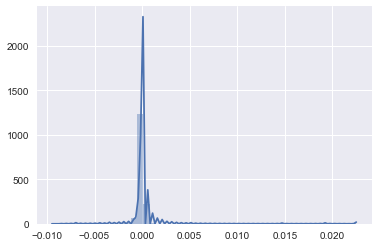

In [65]:
_= sns.distplot(transformedX.apply(np.mean))

In [66]:
transformedX.shape, transformedX_unskew_exclude.shape, transformedX_gain.shape

((99998, 638), (99998, 642), (99998, 665))

In [221]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

def setup_xgb_data(data):
    trainX, testX, trainY, testY = train_test_split(data.loc[train.index,:], train['Y'],
                                                    train_size=0.75, stratify=train['Y'],
                                                    random_state=23)

    dtrain = xgb.DMatrix(trainX, label = trainY)
    dtest = xgb.DMatrix(testX, label = testY)
    
    return dtrain, dtest

In [230]:
trainX = [None] * 6
testX = [None] * 6
trainY = [None] * 6
testY = [None] * 6
dtrain = [None] * 6
dtest = [None] * 6



tic()
i = 0
dtrain[i], dtest[i] = setup_xgb_data(transformedX_gain)
i = 1
dtrain[i], dtest[i] = setup_xgb_data(transformedX_gain_no_onehot)
toc()

tic()
i = 2
dtrain[i], dtest[i] = setup_xgb_data(transformedX_unskew_exclude)
i = 3
dtrain[i], dtest[i] = setup_xgb_data(transformedX_unskew_exclude_allX)
i = 4
dtrain[i], dtest[i] = setup_xgb_data(transformedX_unskew_allX)
toc()

i = 5
dtrain[i], dtest[i] = setup_xgb_data(transformedX_unskew_exclude_allX_pairs)

elapsed: 6.444613 seconds
elapsed: 14.429952 seconds


# Function for quickly making submissions

In [289]:
import os.path

def make_submission(data, num, metadata, iteration=None, bst_params=None):
    name = 'xgb'+str(num)
    if os.path.isfile('submissions/' + name+'.csv') or os.path.isfile('submissions/' + name+'.txt'):
        raise Exception("Error, don't override an existing submission.")
    
    tic()
    deval = xgb.DMatrix(data.loc[test.index,:])
    dtrain = xgb.DMatrix(data.loc[train.index,:], label=train['Y'])
    bst = xgb.train(bst_params, dtrain, **{'num_boost_round':iteration, 'verbose_eval':50})
    toc()
    preds = pd.DataFrame({'Y': 1 - bst.predict(deval)}, index = test.index)
    preds.to_csv('submissions/' + name + '.csv', index_label='id')
    
    open('submissions/' + name + '.txt','w').write(metadata)

# Function for testing a single xgb model with the params defined in the function

In [241]:
import itertools as it

def single(data, data_test):
    global boost_params, train_params
    boost_params = {
        'objective': 'binary:logistic',
        'eta': .1,
        'max_depth': 10,
        'eval_metric': 'auc',
        'scale_pos_weight': (train['Y'] == 1).sum() /1.0/ (train['Y'] == 0).sum(),
        'base_score': (train['Y'] == 0).sum() /1.0/ train.shape[0]
    }

    train_params = {
        'num_boost_round': 2000,
        'evals': [(data, 'train'), (data_test, 'test')],
        'early_stopping_rounds': 200,
        'verbose_eval':100,
    }

    tic()
    bst = xgb.train(boost_params, data, **train_params)
    toc()
    return bst

In [291]:
# a,b = setup_xgb_data(allX_unskew_exclude)
tic()
# xgb.train(params[31], a, **{'num_boost_round':iterations[31], 'evals':[(a,'train'),(b,'test')], 'verbose_eval': 50})
xgb.cv(params[31], xgb.DMatrix(allX_unskew_exclude.loc[train.index],label=train['Y']), **{'num_boost_round':iterations[31], 'verbose_eval': 50, 'seed':23})
toc()

[0]	train-auc:0.5+0	test-auc:0.5+0
[50]	train-auc:0.848508+0.00123225	test-auc:0.844494+0.00664335
[100]	train-auc:0.867832+0.00287361	test-auc:0.858219+0.00499974
[130]	train-auc:0.867832+0.00287361	test-auc:0.858219+0.00499974
elapsed: 7.443188 seconds


In [242]:
best_iteration = []
for data, data_test, _ in zip(dtrain,dtest, xrange(6)):
    if _ != 5:
        continue
    bst = single(data, data_test)
    best_iteration.append(bst.best_iteration)

# bst.best_score, bst.best_iteration and bst.best_ntree_limit

[0]	train-auc:0.5	test-auc:0.5
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 200 rounds.
[100]	train-auc:0.749106	test-auc:0.752449
[200]	train-auc:0.765615	test-auc:0.766823
[300]	train-auc:0.836379	test-auc:0.822755
[400]	train-auc:0.868608	test-auc:0.846615
[500]	train-auc:0.879221	test-auc:0.849674
[600]	train-auc:0.886806	test-auc:0.858594
[700]	train-auc:0.890353	test-auc:0.861505
[800]	train-auc:0.884148	test-auc:0.856786
Stopping. Best iteration:
[677]	train-auc:0.891703	test-auc:0.862135

elapsed: 189.389910 seconds


In [240]:
metadata = str(boost_params) + '\n\n' + str(train_params)
make_submission(transformedX_unskew_exclude_allX_pairs, 23.1, metadata, iteration=best_iteration[-1], bst_params=boost_params)

elapsed: 138.241735 seconds


# "Grid search" area

In [335]:
def grid_search(data, data_test, cv=False):
    global train_params
    
    boost_params = {
        'objective': ['binary:logistic'],
        'eta': [0.01, 0.1, .2, .3],
        'gamma': [0],
        'max_depth': [4,6,8],
        'min_child_weight': [1],
        'eval_metric': ['auc'],
        'scale_pos_weight': [(train['Y'] == 1).sum() /1.0/ (train['Y'] == 0).sum()],
        'base_score': [(train['Y'] == 0).sum() /1.0/ train.shape[0]],
        'tree_method': ['hist'],
    }

    if not cv:
        train_params = {
            'num_boost_round': 2000,
            'evals': [(data_test, 'test')],
            'early_stopping_rounds': 200,
            'verbose_eval': 200,
        }
    else:
#         from sklearn.model_selection import StratifiedKFold
#         kfolds = StratifiedKFold(n_splits=3, random_state=23)
        
        cv_params = {
            'num_boost_round': 2000,
            'metrics': 'auc',
            'early_stopping_rounds': 200,
            'verbose_eval': 200,
            'show_stdv': True,
            'stratified': True,
            'seed': 23,
#             'folds': kfolds,
        }

    grid_results = []
    iterations = []
    params = []
    tic()
    for param_vector in it.product(*boost_params.values()):
        bst_params = {k:v for k,v in zip(boost_params.keys(), param_vector)}
        
        tic()
        if not cv:
            bst = xgb.train(bst_params, data, **train_params)
            grid_results.append(bst.best_score)
            iterations.append(bst.best_iteration)
        else:
            history = xgb.cv(bst_params, data, **cv_params)
            grid_results.append(history.iloc[-1])
            iterations.append(history.shape[0])
        toc()
        
        params.append(bst_params)
    toc()

    return grid_results, iterations, params

# bst.best_score, bst.best_iteration and bst.best_ntree_limit

In [336]:
grid_results, iterations, params = grid_search(
    xgb.DMatrix(allX.loc[train.index], label=train['Y']),
    None,
    cv=True)
# grid_results, iterations, params = grid_search(dtrain[3], dtest[3], cv=True)

[0]	train-auc:0.5+0	test-auc:0.5+0
[200]	train-auc:0.818819+0.0058733	test-auc:0.810956+0.00693794
[400]	train-auc:0.845837+0.00122317	test-auc:0.83969+0.00140655
[600]	train-auc:0.855332+0.000257022	test-auc:0.847215+0.00191656
[800]	train-auc:0.86918+0.000537437	test-auc:0.857113+0.00116562
[1000]	train-auc:0.873568+0.000881031	test-auc:0.858816+0.00123382
[1200]	train-auc:0.876352+0.00088251	test-auc:0.859127+0.00114653
[1400]	train-auc:0.878534+0.001061	test-auc:0.859177+0.00122343
elapsed: 43.666558 seconds
[0]	train-auc:0.5+0	test-auc:0.5+0
[200]	train-auc:0.819151+0.00578868	test-auc:0.81097+0.00692887
[400]	train-auc:0.850737+0.000970746	test-auc:0.840833+0.00142454
[600]	train-auc:0.868116+0.000448561	test-auc:0.851542+0.00242484
[800]	train-auc:0.882635+0.00116043	test-auc:0.857878+0.00120599
[1000]	train-auc:0.888953+0.00104794	test-auc:0.858772+0.00145988
[1200]	train-auc:0.892665+0.00124289	test-auc:0.85881+0.0016006
elapsed: 45.731292 seconds
[0]	train-auc:0.5+0	test-auc:

In [337]:
import pickle
with open('gridsearch5.xgb.grid_results.pickle', 'w') as f:
    pickle.dump(grid_results, f)
with open('gridsearch5.xgb.iterations.pickle', 'w') as f:
    pickle.dump(iterations, f)
with open('gridsearch5.xgb.params.pickle', 'w') as f:
    pickle.dump(params, f)

# "Display Results and Pick Submission" Area

In [340]:
results = pd.DataFrame(dict(
    dict(
        {key: [result[key] for result in grid_results] for key in grid_results[0].index},
        **{'Best Iteration':iterations}
    ),
    **{key: [boost_params[key] for boost_params in params] for key in params[0]}
))
results = results[[key for key in grid_results[0].index] + ['Best Iteration'] + results.columns.difference([key for key in grid_results[0].index] + ['Best Iteration']).tolist()]
display(results.head(30))
# display(results.iloc[30:60])
# display(results.iloc[60:90])
# display(results.iloc[90:120])
# display(results.iloc[120:150])
# display(results.iloc[150:180])
# display(results.iloc[180:210])
# display(results.iloc[210:240])
# display(results.iloc[240:270])

results.to_csv('gridsearch5.xgb.csv', index=False)

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std,Best Iteration,base_score,eta,eval_metric,gamma,max_depth,min_child_weight,objective,scale_pos_weight,tree_method
0,0.859227,0.001128,0.877733,0.000952,1324,0.932777,0.01,auc,0,4,1,binary:logistic,0.072067,hist
1,0.858853,0.001522,0.890112,0.001067,1058,0.932777,0.01,auc,0,6,1,binary:logistic,0.072067,hist
2,0.858014,0.001128,0.900815,0.000984,1008,0.932777,0.01,auc,0,8,1,binary:logistic,0.072067,hist
3,0.859205,0.001704,0.879313,0.001306,142,0.932777,0.10,auc,0,4,1,binary:logistic,0.072067,hist
4,0.858263,0.001205,0.889641,0.001076,100,0.932777,0.10,auc,0,6,1,binary:logistic,0.072067,hist
5,0.857889,0.001316,0.901922,0.001440,101,0.932777,0.10,auc,0,8,1,binary:logistic,0.072067,hist
6,0.858857,0.001261,0.879265,0.000951,68,0.932777,0.20,auc,0,4,1,binary:logistic,0.072067,hist
7,0.857983,0.001615,0.891920,0.001413,54,0.932777,0.20,auc,0,6,1,binary:logistic,0.072067,hist
8,0.856551,0.000628,0.895307,0.000883,41,0.932777,0.20,auc,0,8,1,binary:logistic,0.072067,hist
9,0.858346,0.001135,0.874857,0.000995,30,0.932777,0.30,auc,0,4,1,binary:logistic,0.072067,hist


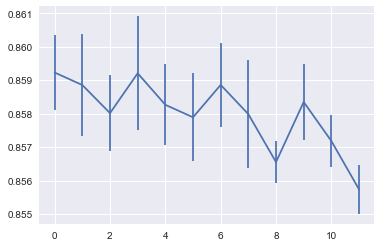

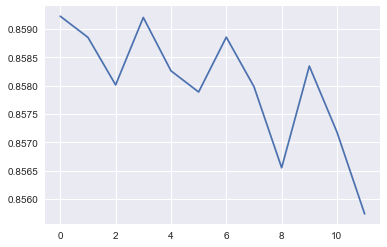

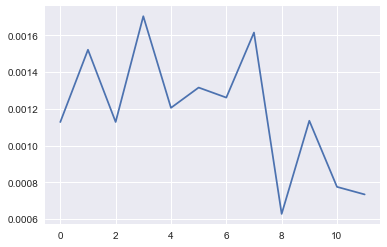

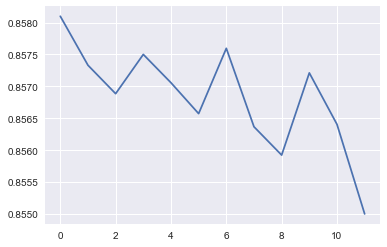

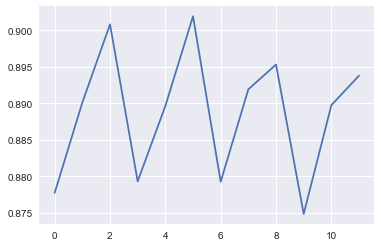

In [341]:
plt.errorbar(range(len(grid_results)), [result['test-auc-mean'] for result in grid_results], [result['test-auc-std'] for result in grid_results])
plt.show()
plt.plot([result['test-auc-mean'] for result in grid_results])
plt.show()
plt.plot([result['test-auc-std'] for result in grid_results])
plt.show()
plt.plot([result['test-auc-mean'] - result['test-auc-std'] for result in grid_results])
plt.show()
plt.plot([result['train-auc-mean'] for result in grid_results])

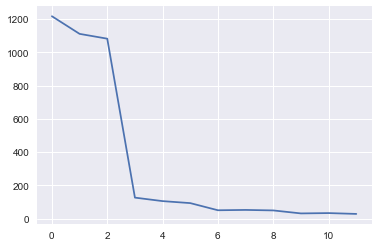

In [319]:
plt.plot(iterations)

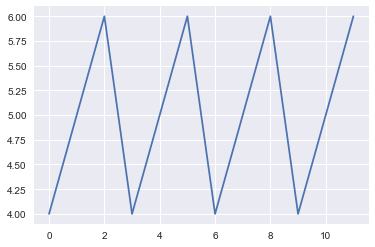

In [320]:
plt.plot([p['max_depth'] for p in params])

In [310]:
pd.read_csv('gridsearch3.1.xgb.csv').iloc[[27,9,45]]

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std,Best Iteration,base_score,eta,eval_metric,gamma,max_depth,min_child_weight,objective,scale_pos_weight,tree_method
27,0.858673,0.005502,0.887335,0.003638,93,0.932777,0.10,auc,0,6,1,binary:logistic,0.072067,hist
9,0.859052,0.005577,0.888629,0.003039,1012,0.932777,0.01,auc,0,6,1,binary:logistic,0.072067,hist
45,0.856957,0.005904,0.892546,0.002575,35,0.932777,0.30,auc,0,6,1,binary:logistic,0.072067,hist


In [329]:
pd.read_csv('gridsearch/gridsearch3.xgb.csv').iloc[[27,9,45,0]]

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std,Best Iteration,base_score,eta,eval_metric,gamma,max_depth,min_child_weight,objective,scale_pos_weight,tree_method
27,0.858703,0.001297,0.887662,0.000994,93,0.932777,0.10,auc,0,6,1,binary:logistic,0.072067,hist
9,0.858623,0.001609,0.889882,0.001049,1082,0.932777,0.01,auc,0,6,1,binary:logistic,0.072067,hist
45,0.858034,0.001397,0.887903,0.001078,28,0.932777,0.30,auc,0,6,1,binary:logistic,0.072067,hist
0,0.858569,0.001234,0.893922,0.001348,945,0.932777,0.01,auc,0,6,0,binary:logistic,0.072067,hist


In [ ]:
# 27, 9, 45 best performing
# best iteration 93, 1082
# eta .1, .01, .3
# gamma 0
# max_depth 6
# min_child_weight 1

In [342]:
results['Underestimate Test AUC'] = results['test-auc-mean'] - results['test-auc-std']
results['Overestimate Test AUC'] = results['test-auc-mean'] + results['test-auc-std']
results[(results['test-auc-mean'] > 0.858) &
        (results['train-auc-mean'] > 0.88) &
        (results['train-auc-mean'] < 0.89)
       ].sort_values('Underestimate Test AUC', ascending=False)

,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std,Best Iteration,base_score,eta,eval_metric,gamma,max_depth,min_child_weight,objective,scale_pos_weight,tree_method,Underestimate Test AUC,Overestimate Test AUC
4,0.858263,0.001205,0.889641,0.001076,100,0.932777,0.1,auc,0,6,1,binary:logistic,0.072067,hist,0.857057,0.859468


In [343]:
metadata = str(results.iloc[4]) + '\n\n' + str(str(params[4])) + '\n\n' + 'Trained with: allX'
make_submission(allX, 38, metadata, iteration = iterations[4], bst_params = params[4])

elapsed: 1.297016 seconds


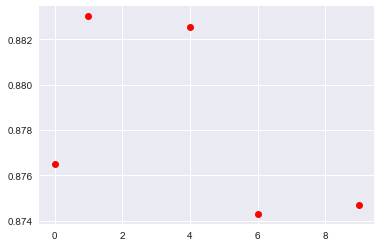

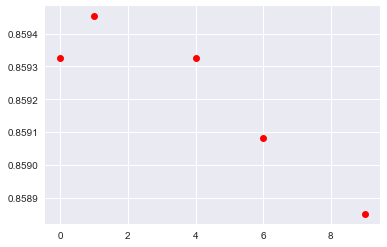

In [325]:
data = results.loc[results['Underestimate Test AUC'] > 0.858]
plt.plot(data['train-auc-mean'], 'ro')
plt.show()
plt.plot(data['test-auc-mean'], 'ro')

In [156]:
iterations[14]

638

In [170]:
metadata = str(results.iloc[130]) + '\n\n' + str(dict(params[130],**{'tree_method':'hist'})) + '\n\n' + 'Trained with: transformedX_unskew_exclude_allX'
make_submission(transformedX_unskew_exclude_allX, 18.1, metadata, iteration = iterations[130], bst_params = dict(params[130],**{'tree_method':'hist'}))

elapsed: 3027.654584 seconds


In [168]:
print str(results.iloc[130]) + '\n\n' + str(dict(params[130],**{'tree_method':'hist'})) + '\n\n' + 'Trained with: transformedX_unskew_exclude_allX'

Test Error                  0.873099
Best Iteration                  2942
base_score                  0.932777
booster                         dart
colsample_bylevel                0.5
colsample_bytree                 0.5
eta                             0.01
eval_metric                      auc
gamma                              1
lambda                             1
max_depth                         16
min_child_weight                   0
objective            binary:logistic
scale_pos_weight           0.0720672
subsample                          1
Name: 130, dtype: object

{'tree_method': 'hist', 'colsample_bytree': 0.5, 'eval_metric': 'auc', 'colsample_bylevel': 0.5, 'scale_pos_weight': 0.072067242747174992, 'base_score': 0.93277731109244366, 'subsample': 1, 'eta': 0.01, 'min_child_weight': 0, 'objective': 'binary:logistic', 'booster': 'dart', 'max_depth': 16, 'gamma': 1, 'lambda': 1}

Trained with: transformedX_unskew_exclude_allX
